<a href="https://colab.research.google.com/github/leahmcgovern/temp/blob/main/07_Linear_Regression_Model_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect to my drive
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
import warnings
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/modelling_dataset_base.csv')
df.head()

date_sp  temp_degcels  gasprice_ppmwh  marketindexprice_ppmwh  \
0  2021-04-01-01          16.0           15.63                   54.31   
1  2021-04-01-02          16.0           15.63                   46.73   
2  2021-04-01-03          16.0           15.76                   43.00   
3  2021-04-01-04          16.0           15.76                   46.65   
4  2021-04-01-05          16.0           16.53                   51.15   

   sysprice_ppmwh  deratedmargin_mw  net_physnotif_mw  dem_forecast_mw  \
0        63.90000         16747.967              -693            21570   
1        36.40000         18460.330               455            21130   
2        35.05000         18928.482               180            21272   
3        43.25011         18602.447               -45            21600   
4        41.00000         18226.246              -495            21478   

   gen_interconnector_mw  gen_biomass_mw  gen_gas_mw  gen_pumped_mw  \
0                   3048            1300        6209              0   
1                   3296            1138        5794              0   
2                   3002            1174        5857              0   
3                   3078            1168        5119              0   
4                   2876            1456        5043              0   

   gen_riverhydro_mw  gen_nuclear_mw  gen_solar_mw  gen_other_mw  \
0                723            4898             0           153   
1                723            4884             0           150   
2                721            4895             0           162   
3                720            4894             0           148   
4                704            4894             0           149   

   gen_forecastwind_mw  
0             6444.686  
1             6198.238  
2             7270.582  
3             7608.011  
4             7527.613

In [ ]:
df.tail()

date_sp  temp_degcels  gasprice_ppmwh  marketindexprice_ppmwh  \
67257  2025-03-31-44          10.6           32.80                   90.89   
67258  2025-03-31-45          10.6           32.74                   86.54   
67259  2025-03-31-46          10.6           32.74                   83.94   
67260  2025-03-31-47          10.6           32.72                   81.54   
67261  2025-03-31-48          10.6           32.72                   80.49   

       sysprice_ppmwh  deratedmargin_mw  net_physnotif_mw  dem_forecast_mw  \
67257           72.80         12252.234             11602            30696   
67258           72.77         14306.333             11636            28838   
67259           72.77         13393.992             11049            26860   
67260           52.25         12974.833             10217            24570   
67261           72.77         14288.595             10498            23480   

       gen_interconnector_mw  gen_biomass_mw  gen_gas_mw  gen_pumped_mw  \
67257                   4556               0           0              0   
67258                   5286               0           0              0   
67259                   5438               0           0              0   
67260                   5988               0           0              0   
67261                   6002               0           0              0   

       gen_riverhydro_mw  gen_nuclear_mw  gen_solar_mw  gen_other_mw  \
67257                  0               0             0             0   
67258                  0               0             0             0   
67259                  0               0             0             0   
67260                  0               0             0             0   
67261                  0               0             0             0   

       gen_forecastwind_mw  
67257             4129.468  
67258             4404.881  
67259             4449.721  
67260             4717.864  
67261             4787.273

In [ ]:
# Display dataset structure and non-null information
print("📋 Dataset Information:\n")
df.info()

print("\n" + "="*60 + "\n")

📋 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67262 entries, 0 to 67261
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_sp                 67262 non-null  object 
 1   temp_degcels            67262 non-null  float64
 2   gasprice_ppmwh          67262 non-null  float64
 3   marketindexprice_ppmwh  67262 non-null  float64
 4   sysprice_ppmwh          67262 non-null  float64
 5   deratedmargin_mw        67262 non-null  float64
 6   net_physnotif_mw        67262 non-null  int64  
 7   dem_forecast_mw         67262 non-null  int64  
 8   gen_interconnector_mw   67262 non-null  int64  
 9   gen_biomass_mw          67262 non-null  int64  
 10  gen_gas_mw              67262 non-null  int64  
 11  gen_pumped_mw           67262 non-null  int64  
 12  gen_riverhydro_mw       67262 non-null  int64  
 13  gen_nuclear_mw          67262 non-null  int64  
 14  gen_solar_mw  

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Variables", fontsize=14)
plt.show()


ValueError: could not convert string to float: '2021-04-01-01'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Function to parse the custom date_sp format (YYYY-MM-DD-HH where HH is period 01-48)
def parse_date_sp_to_datetime(date_sp_str):
    date_part = date_sp_str[:-3]  # 'YYYY-MM-DD'
    period_part = int(date_sp_str[-2:])  # '01' to '48'

    # Base datetime object from YYYY-MM-DD
    dt_obj = pd.to_datetime(date_part)

    # Convert period number to actual hours and minutes
    # Period 1 = 00:00, Period 2 = 00:30, ..., Period 48 = 23:30
    hours = (period_part - 1) // 2
    minutes = ((period_part - 1) % 2) * 30

    return dt_obj + pd.Timedelta(hours=hours, minutes=minutes)

# Apply this conversion to the 'date_sp' column in the entire DataFrame
df['date_sp'] = df['date_sp'].apply(parse_date_sp_to_datetime)

print("DataFrame with 'date_sp' converted to datetime:")
display(df.head())
df.info()

DataFrame with 'date_sp' converted to datetime:


date_sp  temp_degcels  gasprice_ppmwh  marketindexprice_ppmwh  \
0 2021-04-01 00:00:00          16.0           15.63                   54.31   
1 2021-04-01 00:30:00          16.0           15.63                   46.73   
2 2021-04-01 01:00:00          16.0           15.76                   43.00   
3 2021-04-01 01:30:00          16.0           15.76                   46.65   
4 2021-04-01 02:00:00          16.0           16.53                   51.15   

   sysprice_ppmwh  deratedmargin_mw  net_physnotif_mw  dem_forecast_mw  \
0        63.90000         16747.967              -693            21570   
1        36.40000         18460.330               455            21130   
2        35.05000         18928.482               180            21272   
3        43.25011         18602.447               -45            21600   
4        41.00000         18226.246              -495            21478   

   gen_interconnector_mw  gen_biomass_mw  gen_gas_mw  gen_pumped_mw  \
0                   3048            1300        6209              0   
1                   3296            1138        5794              0   
2                   3002            1174        5857              0   
3                   3078            1168        5119              0   
4                   2876            1456        5043              0   

   gen_riverhydro_mw  gen_nuclear_mw  gen_solar_mw  gen_other_mw  \
0                723            4898             0           153   
1                723            4884             0           150   
2                721            4895             0           162   
3                720            4894             0           148   
4                704            4894             0           149   

   gen_forecastwind_mw  
0             6444.686  
1             6198.238  
2             7270.582  
3             7608.011  
4             7527.613

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67262 entries, 0 to 67261
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date_sp                 67262 non-null  datetime64[ns]
 1   temp_degcels            67262 non-null  float64       
 2   gasprice_ppmwh          67262 non-null  float64       
 3   marketindexprice_ppmwh  67262 non-null  float64       
 4   sysprice_ppmwh          67262 non-null  float64       
 5   deratedmargin_mw        67262 non-null  float64       
 6   net_physnotif_mw        67262 non-null  int64         
 7   dem_forecast_mw         67262 non-null  int64         
 8   gen_interconnector_mw   67262 non-null  int64         
 9   gen_biomass_mw          67262 non-null  int64         
 10  gen_gas_mw              67262 non-null  int64         
 11  gen_pumped_mw           67262 non-null  int64         
 12  gen_riverhydro_mw       67262 non-null  int64 

In [ ]:
# Set date_sp as the index
df = df.set_index('date_sp').sort_index()

# Split into train and test using the index labels
train_df = df.loc['2021-04-01':'2024-03-31'].copy()
test_df = df.loc['2024-04-01':'2025-03-31'].copy()

# Save the split datasets to CSV files
train_df.to_csv('train_transformed_data.csv')
test_df.to_csv('test_transformed_data.csv')

# Verify the results
print(f"Training data saved: {train_df.shape[0]} rows (from {train_df.index.min()} to {train_df.index.max()})")
print(f"Testing data saved: {test_df.shape[0]} rows (from {test_df.index.min()} to {test_df.index.max()})")

Training data saved: 49806 rows (from 2021-04-01 00:00:00 to 2024-03-31 22:30:00)
Testing data saved: 17456 rows (from 2024-04-01 00:00:00 to 2025-03-31 23:30:00)


In [ ]:
output_path = '/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/modelling_base_dataset_datetimeindex.csv'
df.to_csv(output_path, index=False)
print(f"DataFrame saved to: {output_path}")

DataFrame saved to: /content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/modelling_base_dataset_datetimeindex.csv


In [ ]:
gdrive_path = '/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/'

# Save train_df to Google Drive
train_output_path = gdrive_path + 'train_base_data.csv'
train_df.to_csv(train_output_path, index=False)
print(f"Training data saved to: {train_output_path}")

# Save test_df to Google Drive
test_output_path = gdrive_path + 'test_base_data.csv'
test_df.to_csv(test_output_path, index=False)
print(f"Testing data saved to: {test_output_path}")

Training data saved to: /content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/train_base_data.csv
Testing data saved to: /content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/test_base_data.csv


# **M1: Linear model for Transformed data** (zuojin) - DECIDE TO ELIMINATE FOR PAPER


In [ ]:
train_df = pd.read_csv(r'/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/train_transformed_data.csv')
test_df = pd.read_csv(r'/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/test_transformed_data.csv')

In [ ]:
X_train = train_df.drop('sysprice_ppmwh', axis=1)
Y_train = train_df['sysprice_ppmwh']
X_test = test_df.drop('sysprice_ppmwh', axis=1)
Y_test = test_df['sysprice_ppmwh']
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (49806, 21)
X_test shape: (17456, 21)
Y_train shape: (49806,)
Y_test shape: (17456,)


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display first 5 scaled values
print("✅ Feature scaling completed successfully!")
print("\n🔹 Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])

✅ Feature scaling completed successfully!

🔹 Scaled Training Data (first 5 rows):
[[ 0.73268313 -1.74051932 -1.00175592  0.66628721 -1.28264603 -0.8799644
   0.38502545  0.27682201  0.16733425  0.27682201  0.08126706 -0.92069414
  -0.7306939   1.42849206  0.27682201  0.40809177 -1.15856317 -0.64858559
   0.27682201 -0.33502103  0.2037262 ]
 [ 0.73268313 -1.74051932 -1.1535474   0.96004325 -1.0505065  -0.95316545
   0.46605224  0.27682201  0.09972415  0.27682201  0.05277887 -0.92069414
  -0.7306939   1.42849206  0.27682201  0.39823197 -1.15856317 -0.64858559
   0.27682201 -0.35381118  0.14992925]
 [ 0.73268313 -1.72601285 -1.23165484  1.04035477 -1.10611483 -0.92954148
   0.36999629  0.27682201  0.11554469  0.27682201  0.05723249 -0.92069414
  -0.7306939   1.42074922  0.27682201  0.40597896 -1.15856317 -0.64858559
   0.27682201 -0.27972978  0.37688948]
 [ 0.73268313 -1.72601285 -1.15519804  0.98442344 -1.15161256 -0.87497342
   0.39482708  0.27682201  0.11294188  0.27682201  0.00177063 

In [ ]:
# Add a constant term to include the intercept in the model
X_train_const = sm.add_constant(X_train_scaled)

# Fit the OLS model
ols_model = sm.OLS(Y_train, X_train_const).fit()

# Display model summary
print("✅ OLS Regression Model Fitted Successfully!\n")
ols_model_summary = ols_model.summary()
ols_model_summary

✅ OLS Regression Model Fitted Successfully!



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sysprice_ppmwh   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     2825.
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:45:29   Log-Likelihood:            -2.9531e+05
No. Observations:               49806   AIC:                         5.907e+05
Df Residuals:                   49787   BIC:                         5.908e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.2622      0.408    329.375      0.000     133.463     135.061
x1             0.2804      0.738      0.380      0.704      -1.167       1.728
x2            -0.2713      0.762     -0.356      0.722      -1.765       1.222
x3            91.4995      0.822    111.316      0.000      89.888      93.111
x4             1.3005      1.022      1.272      0.203      -0.703       3.304
x5            -1.5575      0.503     -3.096      0.002      -2.544      -0.571
x6             3.3777      1.065      3.172      0.002       1.291       5.465
x7            -8.5646      0.574    -14.921      0.000      -9.690      -7.440
x8          1.136e+13   3.41e+13      0.334      0.739   -5.54e+13    7.81e+13
x9            -0.4177      1.762     -0.237      0.813      -3.871       3.035
x10        -3.337e+13      1e+14     -0.334      0.739   -2.29e+14    1.63e+14
x11          -59.8001      3.687    -16.219      0.000     -67.027     -52.574
x12            0.8766      0.693      1.265      0.206      -0.481       2.234
x13            4.6458      0.832      5.586      0.000       3.016       6.276
x14           -1.2242      0.630     -1.944      0.052      -2.459       0.010
x15         1.096e+13   3.29e+13      0.334      0.739   -5.35e+13    7.54e+13
x16           -2.4282      0.831     -2.923      0.003      -4.057      -0.800
x17            1.6578      0.540      3.069      0.002       0.599       2.717
x18           -2.0156      0.535     -3.765      0.000      -3.065      -0.966
x19         1.104e+13   3.31e+13      0.334      0.739   -5.38e+13    7.59e+13
x20            7.3419      0.734     10.005      0.000       5.904       8.780
x21           -5.8909      0.720     -8.181      0.000      -7.302      -4.480
==============================================================================
Omnibus:                   103704.121   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        701750006.174
Skew:                          17.673   Prob(JB):                         0.00
Kurtosis:                     583.433   Cond. No.                     4.13e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.23e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **M1: Map the col names to x1, x2...x21**

In [ ]:
# Get the original column names from X_train
original_feature_names = X_train.columns.tolist()

# Prepend 'const' for the intercept term
ols_variable_map = ['const'] + original_feature_names

# Print the mapping
print("OLS Regression Variable Mapping:")
for i, var_name in enumerate(ols_variable_map):
    if i == 0:
        print(f"const: {var_name}")
    else:
        print(f"x{i}: {var_name}")

OLS Regression Variable Mapping:
const: const
x1: temp_degcels
x2: gasprice_logppmwh
x3: marketindexprice_shiftlogppmwh
x4: deratedmargin_mw
x5: net_physnotif_mw
x6: dem_forecast_mw
x7: gen_interconnector_mw
x8: gen_biomass_bool
x9: gen_biomass_logmw
x10: gen_gas_bool
x11: gen_gas_logmw
x12: gen_pumped_bool
x13: gen_pumped_sqrtmw
x14: gen_riverhydro_mw
x15: gen_nuclear_bool
x16: gen_nuclear_mw
x17: gen_solar_bool
x18: gen_solar_mw
x19: gen_other_bool
x20: gen_other_sqrtmw
x21: gen_forecastwind_sqrtmw


Interpretation of transformed data:


1.  Adjusted R2 (0.505) - only 50% variance explained by model
2.  High condition number (4.13X10^16) means that x variables are highly correlated
3. the boolean variables (x10, x12, x15, x19) have huge coefficients (10^13) and high p-values (0.739) which suggests that the model is ‘exploding’ because it can’t distinguish between the effects of these specific variables
4. x3 (market price) and x11 (gen_gas) has high coeff which suggest that these are influential predictors
5. Durbin-Watson (0.88) is low (ideal is 2) which suggests positive autocorrelation (model is failing to capture a certain trend
6. JB/Skew Kutorsis: super high - data has significant outliers and not normally distributed, so std errors and p-values are less reliable

In [ ]:
# ✅ Calculate residuals using the OLS model
residuals = ols_model.resid  # residuals from the fitted OLS model
fitted_values = ols_model.fittedvalues  # predicted (fitted) values

# Combine into a DataFrame
residuals_df = pd.DataFrame({
    'Fitted Values': fitted_values,
    'Residuals': residuals
})

residuals_df.head()


Fitted Values  Residuals
0      37.646812  26.253188
1      24.771570  11.628430
2      17.638623  17.411377
3      26.892036  16.358074
4      36.311777   4.688223

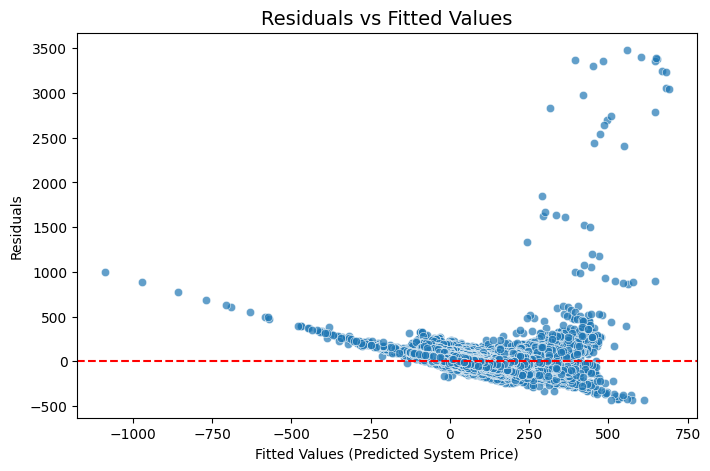

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=residuals_df['Fitted Values'], y=residuals_df['Residuals'], alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values', fontsize=14)
plt.xlabel('Fitted Values (Predicted System Price)')
plt.ylabel('Residuals')
plt.show()

In [ ]:
### Code to Perform Durbin-Watson Test to check for autocorrelation in residuals

from statsmodels.stats.stattools import durbin_watson

# Durbin–Watson Statistic
dw_stat = durbin_watson(ols_model.resid)
print(f"Durbin–Watson Statistic: {dw_stat:.3f}")

# Interpretation
if 1.5 < dw_stat < 2.5:
    print("✅ No autocorrelation detected (Good).")
else:
    print("⚠️ Possible autocorrelation in residuals.")

Durbin–Watson Statistic: 0.880
⚠️ Possible autocorrelation in residuals.


<Figure size 800x600 with 0 Axes>

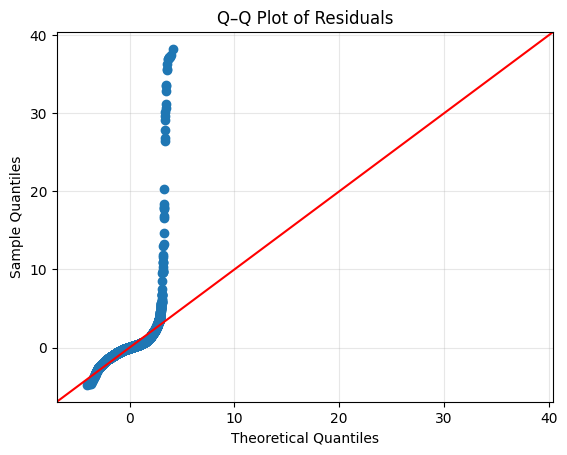

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q–Q Plot for Normality
plt.figure(figsize=(8, 6))
sm.qqplot(ols_model.resid, line='45', fit=True)
plt.title('Q–Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True, alpha=0.3)
plt.show()


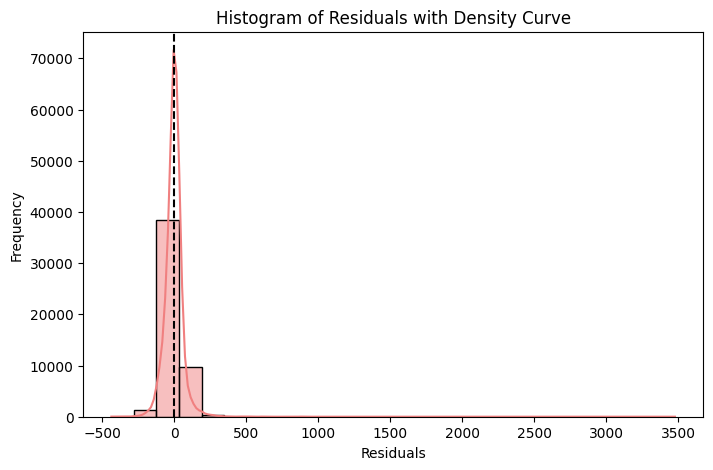

In [ ]:
import seaborn as sns

# Histogram + KDE
plt.figure(figsize=(8, 5))
sns.histplot(ols_model.resid, kde=True, color='lightcoral', bins=25)
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Histogram of Residuals with Density Curve')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


MODEL DIAGNOSTICS


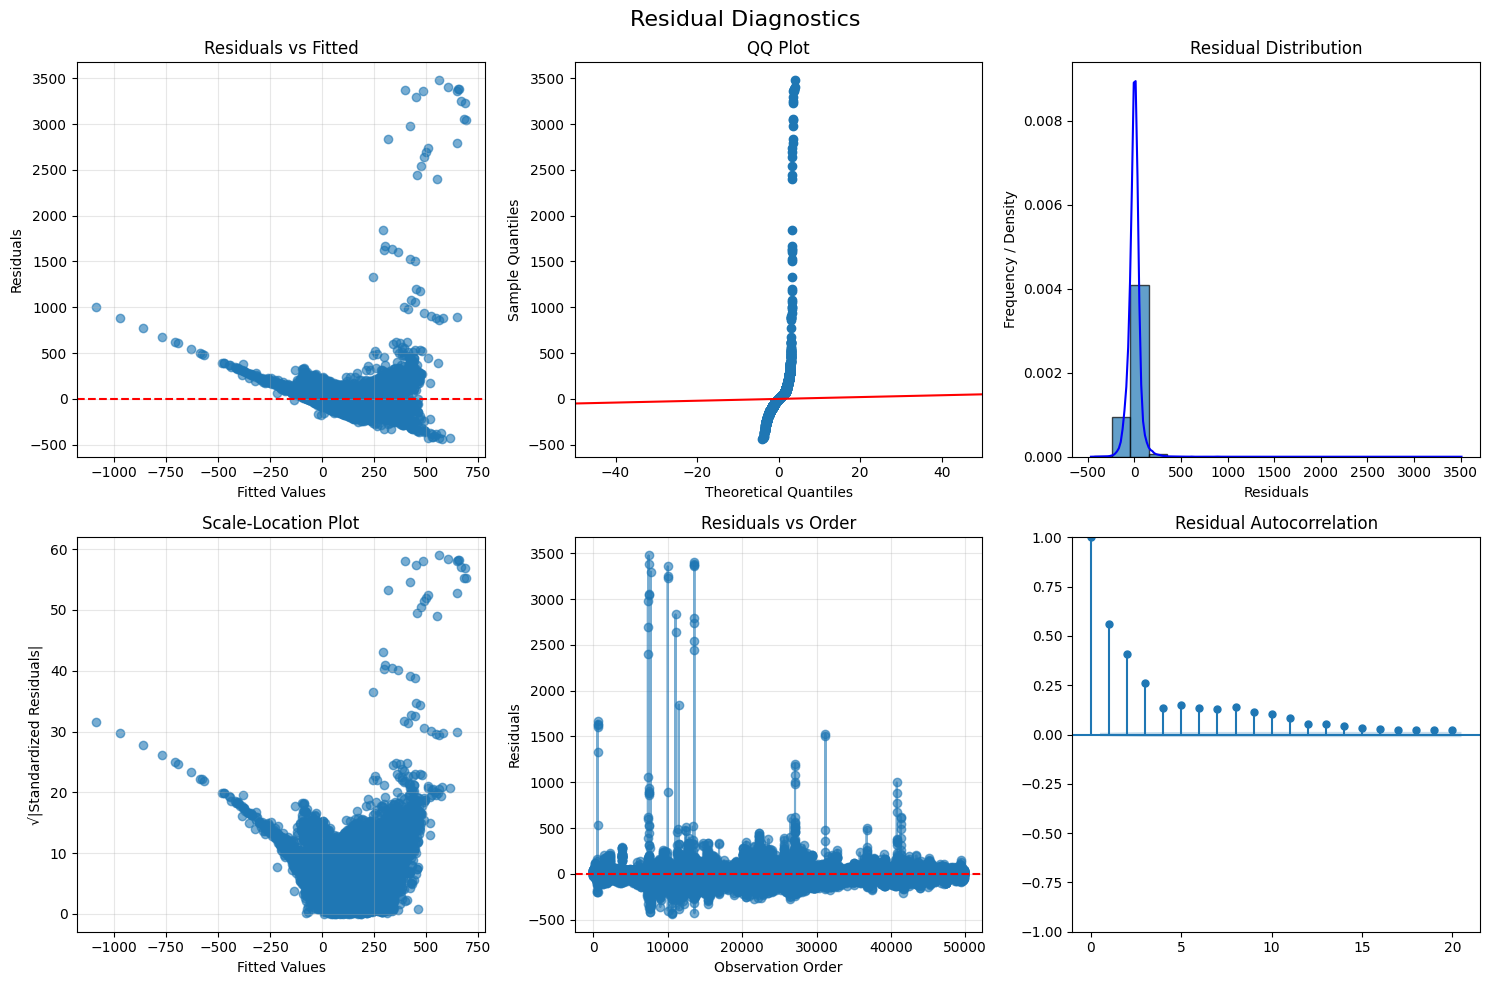


Diagnostic Tests:
----------------------------------------
Durbin-Watson: 0.880
Interpretation: Values near 2 indicate no autocorrelation
   < 1.5: Positive autocorrelation
   1.5-2.5: No autocorrelation
   > 2.5: Negative autocorrelation

Jarque-Bera Test: Stat = 701750006.174, p-value = 0.000
Skewness: 17.673, Kurtosis: 583.433
H0: Residuals are normally distributed
Conclusion: Reject H0 (non-normal)

Breusch-Pagan Test: LM = 1142.353, p-value = 0.000
H0: Homoscedasticity (constant variance)
Conclusion: Reject H0 (heteroscedastic)

Rainbow Test: F = 1.054, p-value = 0.000
H0: Model is correctly specified (linear)
Conclusion: Reject H0 (non-linear)


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
import warnings

# Comprehensive diagnostic analysis
print("\n" + "="*80)
print("MODEL DIAGNOSTICS")
print("="*80)

# 3.1 Residual Analysis
residuals = ols_model.resid  # residuals from the fitted OLS model
fitted = ols_model.fittedvalues  # predicted (fitted) values

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Residual Diagnostics', fontsize=16)

# Residuals vs Fitted
axes[0, 0].scatter(fitted, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].grid(True, alpha=0.3)

# QQ-Plot
from scipy import stats
sm.qqplot(residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_title('QQ Plot')
axes[0, 1].set_xlim(-50, 50) # Set x-axis limits for the QQ plot

# Residual Histogram
axes[0, 2].hist(residuals, bins=20, edgecolor='black', alpha=0.7, density=True) # Changed to density=True for KDE
sns.kdeplot(residuals, ax=axes[0, 2], color='blue') # Added KDE plot
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Frequency / Density') # Updated label
axes[0, 2].set_title('Residual Distribution')

# Scale-Location Plot
axes[1, 0].scatter(fitted, np.sqrt(np.abs(residuals)), alpha=0.6)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot')
axes[1, 0].grid(True, alpha=0.3)

# Residuals vs Order
axes[1, 1].plot(range(len(residuals)), residuals, 'o-', alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Observation Order')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Order')
axes[1, 1].grid(True, alpha=0.3)

# ACF of Residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=20, ax=axes[1, 2], alpha=0.05)
axes[1, 2].set_title('Residual Autocorrelation')

plt.tight_layout()
plt.show()

# 3.2 Statistical Tests for Assumptions
print("\nDiagnostic Tests:")
print("-" * 40)

# Durbin-Watson for autocorrelation
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson: {dw_stat:.3f}")
print("Interpretation: Values near 2 indicate no autocorrelation")
print("   < 1.5: Positive autocorrelation")
print("   1.5-2.5: No autocorrelation")
print("   > 2.5: Negative autocorrelation")

# Jarque-Bera for normality
jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(residuals)
print(f"\nJarque-Bera Test: Stat = {jb_stat:.3f}, p-value = {jb_pvalue:.3f}")
print(f"Skewness: {skew:.3f}, Kurtosis: {kurtosis:.3f}")
print("H0: Residuals are normally distributed")
print(f"Conclusion: {'Fail to reject H0 (normality)' if jb_pvalue > 0.05 else 'Reject H0 (non-normal)'}")

# Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(residuals, X_train_const)
print(f"\nBreusch-Pagan Test: LM = {bp_test[0]:.3f}, p-value = {bp_test[1]:.3f}")
print("H0: Homoscedasticity (constant variance)")
print(f"Conclusion: {'Fail to reject H0 (homoscedastic)' if bp_test[1] > 0.05 else 'Reject H0 (heteroscedastic)'}")

# Rainbow test for linearity
rainbow_stat, rainbow_pval = linear_rainbow(ols_model)
print(f"\nRainbow Test: F = {rainbow_stat:.3f}, p-value = {rainbow_pval:.3f}")
print("H0: Model is correctly specified (linear)")
print(f"Conclusion: {'Fail to reject H0 (linear)' if rainbow_pval > 0.05 else 'Reject H0 (non-linear)'}")

### **Interpretation of Diagnostic Test Results for Transformed Data (M1)**

The diagnostic tests performed on the OLS model for the transformed data reveal significant violations of key assumptions:

1.  **Durbin-Watson Statistic (0.880):** This value is significantly below the ideal range of 1.5 to 2.5, indicating **strong positive autocorrelation** in the residuals. This means that consecutive error terms are positively correlated, which is a common issue in time-series data and violates the assumption of independent errors. This renders the standard errors and p-values unreliable.

2.  **Jarque-Bera Test (Stat = 701,750,006.174, p-value = 0.000):** The p-value of 0.000 overwhelmingly leads to the **rejection of the null hypothesis that residuals are normally distributed**. With an extremely high skewness (17.673) and kurtosis (583.433), the residuals are highly skewed and possess very heavy tails, implying the presence of numerous extreme outliers and a severe departure from normality. This violation means that statistical inferences, such as p-values for coefficient significance and confidence intervals, cannot be trusted.

3.  **Breusch-Pagan Test (LM = 1142.353, p-value = 0.000):** The p-value of 0.000 indicates that we **reject the null hypothesis of homoscedasticity**. This implies the presence of **heteroscedasticity**, meaning the variance of the residuals is not constant across all levels of the independent variables. This violation leads to inefficient OLS coefficient estimates and unreliable standard errors.

4.  **Rainbow Test (F = 1.054, p-value = 0.000):** The p-value of 0.000 suggests that we **reject the null hypothesis that the model is correctly specified (linear)**. This indicates a significant departure from linearity, meaning that a simple linear relationship might not adequately capture the underlying patterns in the data.

**Overall Conclusion on Diagnostics for Transformed Data (M1):**

All four major diagnostic tests point to severe violations of the classical OLS assumptions. The model suffers from strong autocorrelation, extreme non-normality, heteroscedasticity, and issues with linearity. Consequently, while the model provides some explanatory power (R-squared = 0.505), the statistical validity of its coefficients, standard errors, and p-values is highly compromised. Further modeling efforts should prioritize addressing these fundamental issues.

## **M1: Run LASSO since model has high collinearity**

In [ ]:
from sklearn.linear_model import LassoCV

#Run LASSO with Cross-Validation to find the best penalty (alpha)
lasso = LassoCV(cv=5, random_state=42).fit(X_train_scaled, Y_train)

# Check which variables survived
lasso_coeffs = pd.Series(lasso.coef_, index=X_train.columns)
print("Variables kept by LASSO:")
print(lasso_coeffs[lasso_coeffs != 0])

print(f"\nVariables dropped: {sum(lasso_coeffs == 0)}")

# Compare performance
print(f"Training R^2: {lasso.score(X_train_scaled, Y_train):.4f}")
print(f"Test R^2: {lasso.score(X_test_scaled, Y_test):.4f}")

Interpretation: The test R2 is lower than training R2, which suggests that the model is not predicting well. training R2 is also lower than pre-lasso R2 which is 0.505

## M1:Generate y_predict vs y_actual graph

In [ ]:
# 1. Generate predictions for the test set
y_pred_test = lasso.predict(X_test_scaled)

# 2. Generate predictions for the training set
y_pred_train = lasso.predict(X_train_scaled)

# 3. View the first few predictions
print("First 5 Predicted Prices:", y_pred_test[:5])

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred_test, alpha=0.3, color='teal')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual System Price')
plt.ylabel('LASSO Predicted Price')
plt.title(f'LASSO Predicted vs. Actual for transformed data (Test R²: {lasso.score(X_test_scaled, Y_test):.4f})')
plt.show()

In [ ]:
# plot for OLS

import statsmodels.api as sm

# 1. Add the constant column to your scaled test data
X_trf_test_with_const = sm.add_constant(X_test_scaled)

# 2. Verify the new shape (should be (17456, 16))
print(f"New shape: {X_trf_test_with_const.shape}")

# 3. Run the prediction
Y_trf_pred = ols_model.predict(X_trf_test_with_const)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_trf_pred, alpha=0.3, color='teal', label='Predictions')

# Add the 'Perfect Prediction' 45-degree line to see where the model is under or over-predicting
max_val = max(Y_test.max(), Y_trf_pred.max())
min_val = min(Y_test.min(), Y_trf_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual System Price (ppmwh)')
plt.ylabel('Predicted System Price (ppmwh)')
plt.title('OLS Model: Predicted vs. Actual System Prices (Transformed data)')

# 3. Run the prediction
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

# **M3: Linear model for Non-Transformed data Con't** (Leah)


In [ ]:
#connect to my drive
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


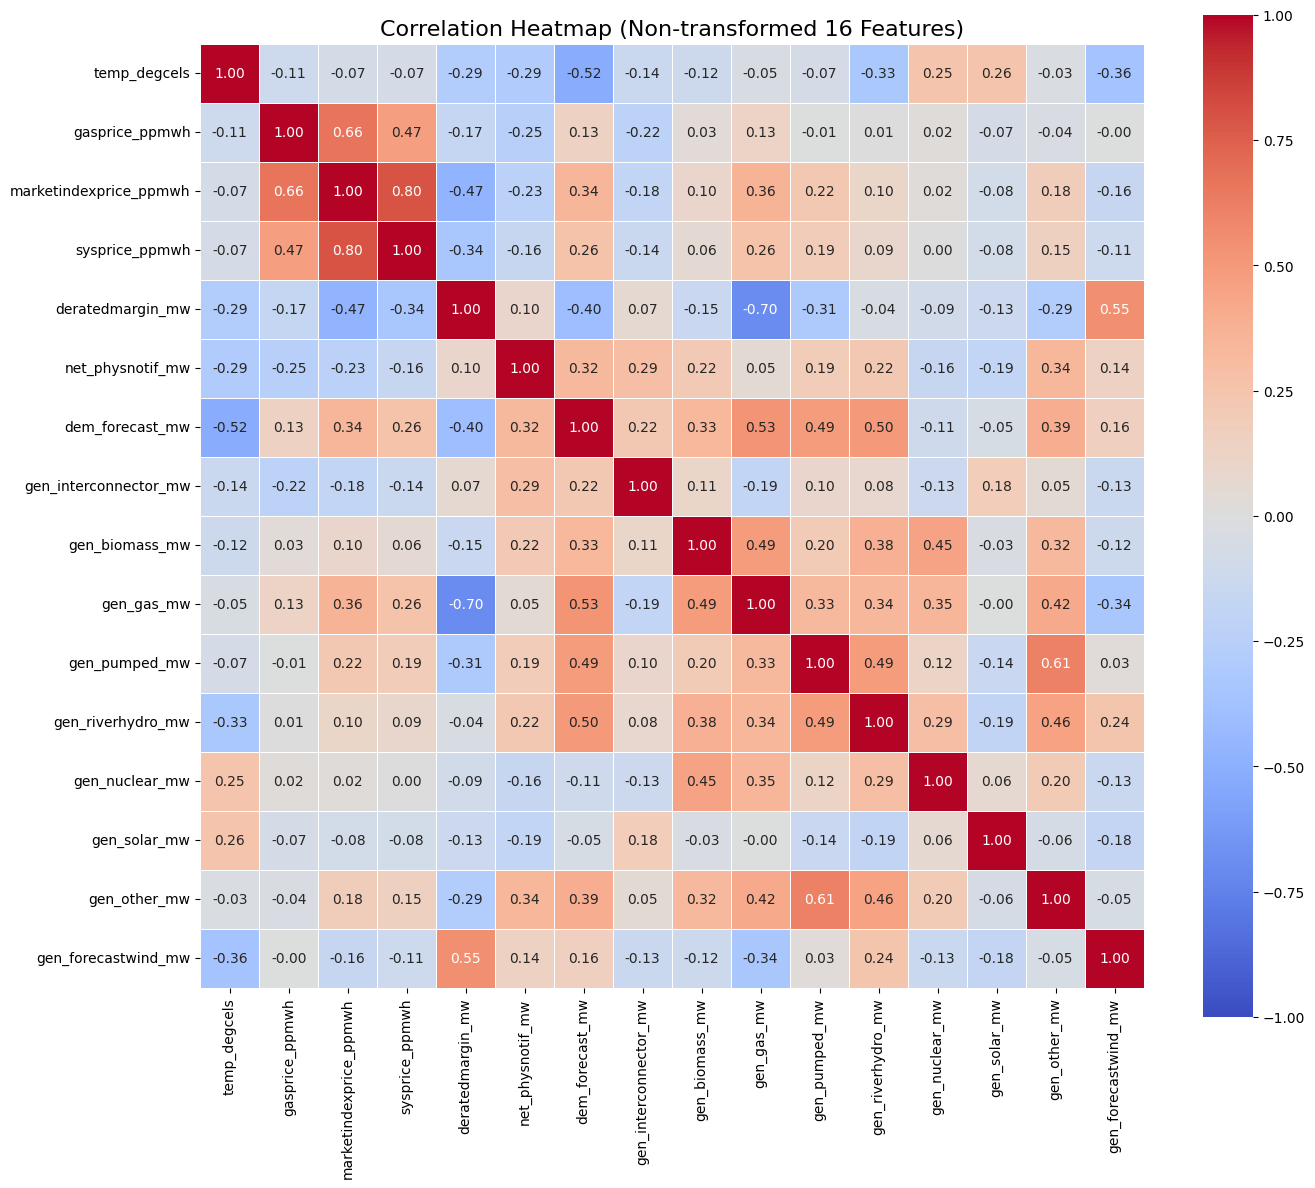

In [ ]:
#generate corr map to examine

base_df = pd.read_csv(r"/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/modelling_base_dataset_datetimeindex.csv")
numerical_base_df = base_df.select_dtypes(include=['number'])
corr_matrix = numerical_base_df.corr()

#replot heatmap
plt.figure(figsize=(14, 12))  # Large size to make labels readable
sns.heatmap(
    corr_matrix,
    annot=True,       # Show the numbers on the boxes
    fmt=".2f",        # Format to 2 decimal places
    cmap='coolwarm',  # Red = Positive, Blue = Negative
    center=0,         # Center color map at 0
    vmin=-1, vmax=1,  # Fix scale from -1 to 1
    linewidths=0.5,   # Add white lines between squares
    square=True       # Force squares for better aspect ratio
)

plt.title(f"Correlation Heatmap (Non-transformed {len(numerical_base_df.columns)} Features)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
train_base_df = pd.read_csv(r'/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/train_base_data.csv')
test_base_df = pd.read_csv(r'/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/test_base_data.csv')

In [ ]:
train_base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49806 entries, 0 to 49805
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp_degcels            49806 non-null  float64
 1   gasprice_ppmwh          49806 non-null  float64
 2   marketindexprice_ppmwh  49806 non-null  float64
 3   sysprice_ppmwh          49806 non-null  float64
 4   deratedmargin_mw        49806 non-null  float64
 5   net_physnotif_mw        49806 non-null  int64  
 6   dem_forecast_mw         49806 non-null  int64  
 7   gen_interconnector_mw   49806 non-null  int64  
 8   gen_biomass_mw          49806 non-null  int64  
 9   gen_gas_mw              49806 non-null  int64  
 10  gen_pumped_mw           49806 non-null  int64  
 11  gen_riverhydro_mw       49806 non-null  int64  
 12  gen_nuclear_mw          49806 non-null  int64  
 13  gen_solar_mw            49806 non-null  int64  
 14  gen_other_mw            49806 non-null

In [ ]:
X_base_train = train_base_df.drop('sysprice_ppmwh', axis=1)
Y_base_train = train_base_df['sysprice_ppmwh']
X_base_test = test_base_df.drop('sysprice_ppmwh', axis=1)
Y_base_test = test_base_df['sysprice_ppmwh']
print(f"X_base train shape: {X_base_train.shape}")
print(f"X_base test shape: {X_base_test.shape}")
print(f"Y_base train shape: {Y_base_train.shape}")
print(f"Y_base test shape: {Y_base_test.shape}")

# Display the first few rows of each
print("🔹 Predictor Variables (X):")
display(X_base_train.head())

print("\n Target Variable (Y):")
display(Y_base_train.head())

X_base train shape: (49806, 15)
X_base test shape: (17456, 15)
Y_base train shape: (49806,)
Y_base test shape: (17456,)
🔹 Predictor Variables (X):


temp_degcels  gasprice_ppmwh  marketindexprice_ppmwh  deratedmargin_mw  \
0          16.0           15.63                   54.31         16747.967   
1          16.0           15.63                   46.73         18460.330   
2          16.0           15.76                   43.00         18928.482   
3          16.0           15.76                   46.65         18602.447   
4          16.0           16.53                   51.15         18226.246   

   net_physnotif_mw  dem_forecast_mw  gen_interconnector_mw  gen_biomass_mw  \
0              -693            21570                   3048            1300   
1               455            21130                   3296            1138   
2               180            21272                   3002            1174   
3               -45            21600                   3078            1168   
4              -495            21478                   2876            1456   

   gen_gas_mw  gen_pumped_mw  gen_riverhydro_mw  gen_nuclear_mw  gen_solar_mw  \
0        6209              0                723            4898             0   
1        5794              0                723            4884             0   
2        5857              0                721            4895             0   
3        5119              0                720            4894             0   
4        5043              0                704            4894             0   

   gen_other_mw  gen_forecastwind_mw  
0           153             6444.686  
1           150             6198.238  
2           162             7270.582  
3           148             7608.011  
4           149             7527.613


 Target Variable (Y):


0    63.90000
1    36.40000
2    35.05000
3    43.25011
4    41.00000
Name: sysprice_ppmwh, dtype: float64

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test sets
X_base_train_scaled = scaler.fit_transform(X_base_train)
X_base_test_scaled = scaler.transform(X_base_test)

# Display first 5 scaled values
print("✅ Feature scaling completed successfully!")
print("\n🔹 Scaled BASE Training Data (first 5 rows):")
print(X_base_train_scaled[:5])

✅ Feature scaling completed successfully!

🔹 Scaled BASE Training Data (first 5 rows):
[[ 0.73268313 -0.9965144  -0.84222136  0.66628721 -1.28264603 -0.8799644
   0.38502545 -0.42114767 -0.72521549 -0.53239194  1.42849206  0.40809177
  -0.64858559 -0.47123837  0.01728921]
 [ 0.73268313 -0.9965144  -0.92334357  0.96004325 -1.0505065  -0.95316545
   0.46605224 -0.61552461 -0.79523166 -0.53239194  1.42849206  0.39823197
  -0.64858559 -0.4852996  -0.03741312]
 [ 0.73268313 -0.99257079 -0.96326254  1.04035477 -1.10611483 -0.92954148
   0.36999629 -0.57232974 -0.7846027  -0.53239194  1.42074922  0.40597896
  -0.64858559 -0.42905467  0.20060751]
 [ 0.73268313 -0.99257079 -0.92419974  0.98442344 -1.15161256 -0.87497342
   0.39482708 -0.57952888 -0.90911339 -0.53239194  1.4168778   0.40527469
  -0.64858559 -0.49467375  0.27550424]
 [ 0.73268313 -0.9692125  -0.87604011  0.91988612 -1.24260803 -0.89527008
   0.32882946 -0.23396987 -0.92193563 -0.53239194  1.35493505  0.40527469
  -0.64858559 -0.4

## M3: Model, Diagnostic Tests, and Eval Metrics

In [ ]:
# Convert the scaled array back into a DataFrame using original column names
X_scaled_df = pd.DataFrame(
    X_base_train_scaled,
    columns=X_base_train.columns,
    index=X_base_train.index
)

# Add a constant term to include the intercept in the model
X_base_train_const = sm.add_constant(X_scaled_df)

# Fit the OLS model
ols_base_model = sm.OLS(Y_base_train, X_base_train_const).fit()

# Display model summary
print("✅ OLS Regression Model Fitted Successfully!\n")
ols_base_model_summary = ols_base_model.summary()
print(ols_base_model_summary)

✅ OLS Regression Model Fitted Successfully!

                            OLS Regression Results                            
Dep. Variable:         sysprice_ppmwh   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     5677.
Date:                Sat, 03 Jan 2026   Prob (F-statistic):               0.00
Time:                        16:04:23   Log-Likelihood:            -2.8801e+05
No. Observations:               49806   AIC:                         5.760e+05
Df Residuals:                   49790   BIC:                         5.762e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### Interpretation of OLS Model Results (Base Data):

**Key Findings:**

1.  **R-squared (0.631):** The model explains approximately 63.1% of the variance in system price, which is a moderate improvement over the transformed data model.
2.  **Multicollinearity Addressed:** The condition number (7.11) is significantly improved, indicating that multicollinearity is no longer a major issue.
3.  **Significant Predictors:** 'marketindexprice_ppmwh' is a very strong positive predictor. Other significant predictors include 'gasprice_ppmwh' (unexpectedly negative), 'deratedmargin_mw', 'dem_forecast_mw', 'gen_gas_mw', 'gen_pumped_mw', 'gen_nuclear_mw', and 'gen_other_mw'.
4.  **Persistent Issues:** Durbin-Watson (1.128) still indicates positive autocorrelation, and residual plots show strong non-normality and outliers, violating OLS assumptions. This suggests that while the fit is better, the model could be improved by addressing these time-series specific issues or exploring non-linear relationships.

In [ ]:
X_base_test_const = sm.add_constant(X_base_test_scaled)

# Generate Predictions for the full Base untransformed data
train_base_preds = ols_base_model .predict(X_base_train_const)
test_base_preds = ols_base_model.predict(X_base_test_const)

# Calculate Metrics for the full base untransformed data
train_r2_base = r2_score(Y_base_train, train_base_preds)
train_mae_base = mean_absolute_error(Y_base_train, train_base_preds)
test_r2_base = r2_score(Y_base_test, test_base_preds)
test_mae_base = mean_absolute_error(Y_base_test, test_base_preds)

# Print Results
print(f"--- Evaluation metrics for OLS M3 untransformed Data---")
print(f"Train R2:  {train_r2_base:.4f} | Train MAE: £{train_mae_base:.2f}")
print(f"Test R2:   {test_r2_base:.4f} | Test MAE:  £{test_mae_base:.2f}")
print("-" * 60)

--- Evaluation metrics for OLS M3 untransformed Data---
Train R2:  0.6311 | Train MAE: £39.56
Test R2:   0.5927 | Test MAE:  £22.81
------------------------------------------------------------


In [ ]:
# Get the original column names from X_train
original_base_feature_names = X_base_train.columns.tolist()

# Prepend 'const' for the intercept term
ols_base_variable_map = ['const'] + original_base_feature_names

# Print the mapping
print("OLS Regression Base Variable Mapping:")
for i, var_name in enumerate(ols_base_variable_map):
    if i == 0:
        print(f"const: {var_name}")
    else:
        print(f"x{i}: {var_name}")

OLS Regression Base Variable Mapping:
const: const
x1: temp_degcels
x2: gasprice_ppmwh
x3: marketindexprice_ppmwh
x4: deratedmargin_mw
x5: net_physnotif_mw
x6: dem_forecast_mw
x7: gen_interconnector_mw
x8: gen_biomass_mw
x9: gen_gas_mw
x10: gen_pumped_mw
x11: gen_riverhydro_mw
x12: gen_nuclear_mw
x13: gen_solar_mw
x14: gen_other_mw
x15: gen_forecastwind_mw


In [ ]:
# ✅ Calculate residuals of the base data using the OLS model
base_residuals = ols_base_model.resid  # residuals from the fitted OLS model
base_fitted_values = ols_base_model.fittedvalues  # predicted (fitted) values

# Combine into a DataFrame
base_residuals_df = pd.DataFrame({
    'Fitted Values': base_fitted_values,
    'Residuals': base_residuals
})

base_residuals_df.head()

Fitted Values  Residuals
0      57.652153   6.247847
1      50.838386 -14.438386
2      46.383376 -11.333376
3      50.422068  -7.171958
4      54.917933 -13.917933


Base (untransformed) MODEL DIAGNOSTICS


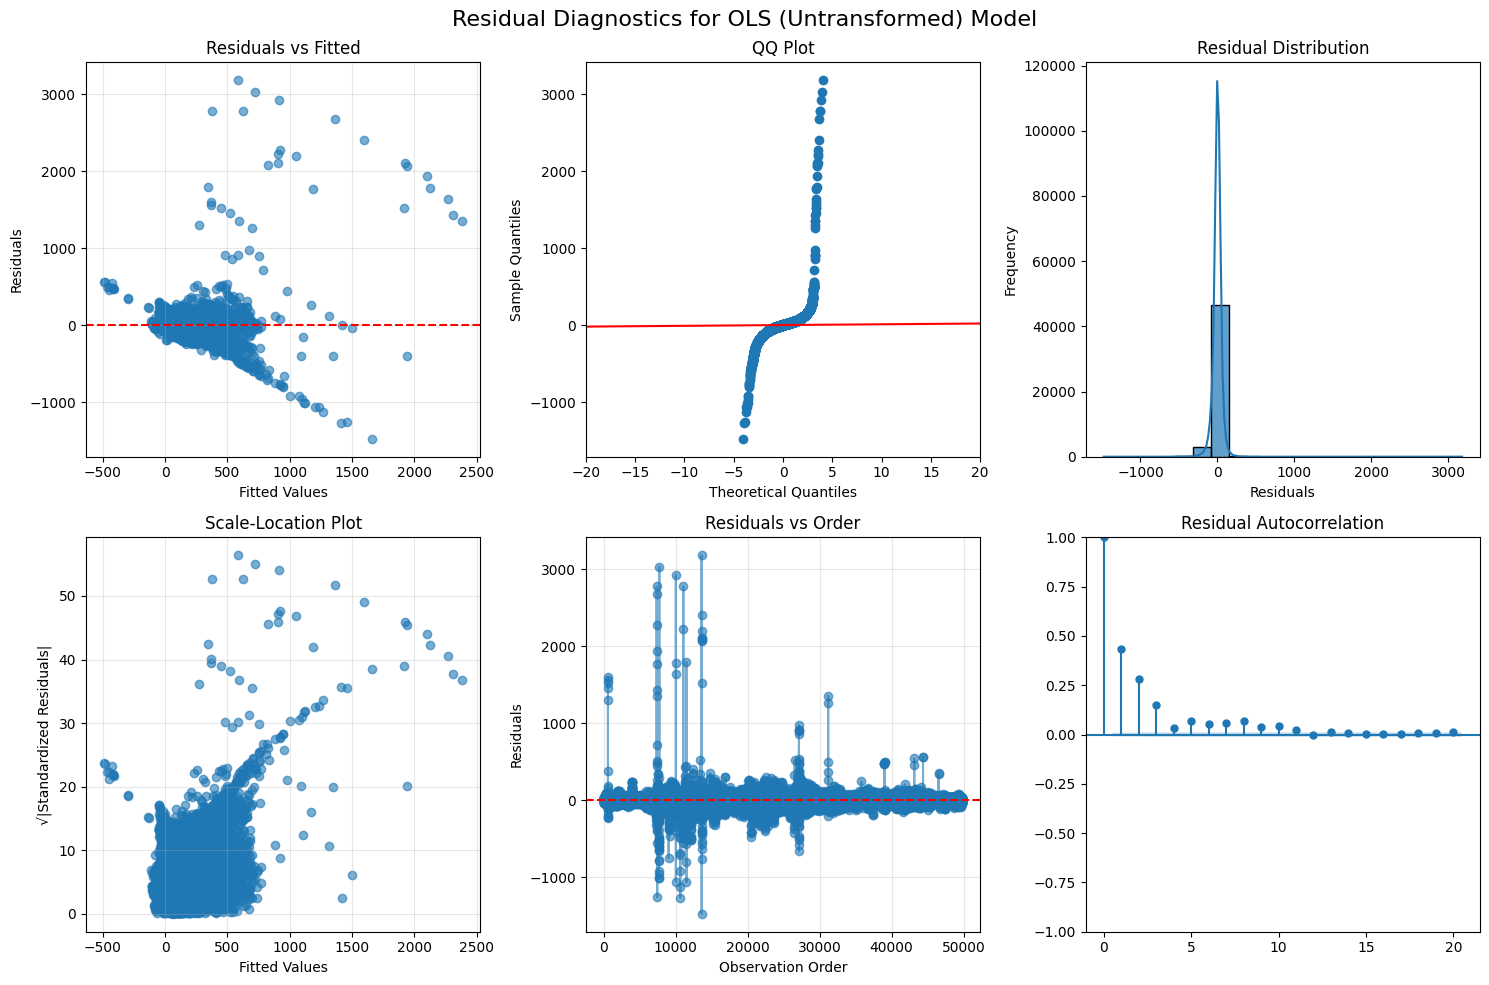


M3 Diagnostic Tests:
----------------------------------------
Durbin-Watson: 1.128
Interpretation: Values near 2 indicate no autocorrelation
   < 1.5: Positive autocorrelation
   1.5-2.5: No autocorrelation
   > 2.5: Negative autocorrelation

Jarque-Bera Test: Stat = 315581671.933, p-value = 0.000
Skewness: 11.076, Kurtosis: 392.331
H0: Residuals are normally distributed
Conclusion: Reject H0 (non-normal)

Breusch-Pagan Test: LM = 4871.578, p-value = 0.000
H0: Homoscedasticity (constant variance)
Conclusion: Reject H0 (heteroscedastic)

Rainbow Test: F = 1.056, p-value = 0.000
H0: Model is correctly specified (linear)
Conclusion: Reject H0 (non-linear)


In [ ]:
# Comprehensive diagnostic analysis
print("\n" + "="*80)
print("Base (untransformed) MODEL DIAGNOSTICS")
print("="*80)

# 3.1 Residual Analysis
base_residuals = ols_base_model.resid  # residuals from the fitted OLS model
base_fitted_values = ols_base_model.fittedvalues  # predicted (fitted) values

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Residual Diagnostics for OLS (Untransformed) Model', fontsize=16)

# Residuals vs Fitted
axes[0, 0].scatter(base_fitted_values, base_residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].grid(True, alpha=0.3)

# QQ-Plot
from scipy import stats
sm.qqplot(base_residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_xlim(-20, 20)
axes[0, 1].set_title('QQ Plot')


# Residual Histogram
sns.histplot(base_residuals, kde=True, bins=20, edgecolor='black', alpha=0.7, ax=axes[0, 2]) # Added kde=True
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Residual Distribution')

# Scale-Location Plot
axes[1, 0].scatter(base_fitted_values, np.sqrt(np.abs(base_residuals)), alpha=0.6)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot')
axes[1, 0].grid(True, alpha=0.3)

# Residuals vs Order
axes[1, 1].plot(range(len(base_residuals)), base_residuals, 'o-', alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Observation Order')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Order')
axes[1, 1].grid(True, alpha=0.3)

# ACF of Residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(base_residuals, lags=20, ax=axes[1, 2], alpha=0.05)
axes[1, 2].set_title('Residual Autocorrelation')

plt.tight_layout()
plt.show()

# 3.2 Statistical Tests for Assumptions
print("\nM3 Diagnostic Tests:")
print("-" * 40)

# Durbin-Watson for autocorrelation
dw_stat = durbin_watson(base_residuals)
print(f"Durbin-Watson: {dw_stat:.3f}")
print("Interpretation: Values near 2 indicate no autocorrelation")
print("   < 1.5: Positive autocorrelation")
print("   1.5-2.5: No autocorrelation")
print("   > 2.5: Negative autocorrelation")

# Jarque-Bera for normality
jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(base_residuals)
print(f"\nJarque-Bera Test: Stat = {jb_stat:.3f}, p-value = {jb_pvalue:.3f}")
print(f"Skewness: {skew:.3f}, Kurtosis: {kurtosis:.3f}")
print("H0: Residuals are normally distributed")
print(f"Conclusion: {'Fail to reject H0 (normality)' if jb_pvalue > 0.05 else 'Reject H0 (non-normal)'}")

# Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(base_residuals, X_base_train_const)
print(f"\nBreusch-Pagan Test: LM = {bp_test[0]:.3f}, p-value = {bp_test[1]:.3f}")
print("H0: Homoscedasticity (constant variance)")
print(f"Conclusion: {'Fail to reject H0 (homoscedastic)' if bp_test[1] > 0.05 else 'Reject H0 (heteroscedastic)'}")

# Rainbow test for linearity
rainbow_stat, rainbow_pval = linear_rainbow(ols_base_model)
print(f"\nRainbow Test: F = {rainbow_stat:.3f}, p-value = {rainbow_pval:.3f}")
print("H0: Model is correctly specified (linear)")
print(f"Conclusion: {'Fail to reject H0 (linear)' if rainbow_pval > 0.05 else 'Reject H0 (non-linear)'}")

### **Interpretation of Diagnostic Test Results for Base Data (M3)**

The diagnostic tests performed on the OLS model for the base (non-transformed) data reveal persistent and significant violations of key assumptions, even with an improved R-squared:

1.  **Durbin-Watson Statistic (1.128):** This value is still significantly below the ideal range of 1.5 to 2.5, indicating **strong positive autocorrelation** in the residuals. This suggests that the model is still failing to fully capture temporal dependencies in the time-series data, and consecutive error terms are positively correlated. This renders the standard errors and p-values unreliable.

2.  **Jarque-Bera Test (Stat = 315,581,671.933, p-value = 0.000):** The p-value of 0.000 overwhelmingly leads to the **rejection of the null hypothesis that residuals are normally distributed**. The residuals exhibit very high skewness (11.076) and kurtosis (392.331), indicating a severe departure from normality with numerous extreme outliers and heavy tails. Similar to the transformed model, this means statistical inferences about coefficient significance and confidence intervals are not trustworthy.

3.  **Breusch-Pagan Test (LM = 4871.578, p-value = 0.000):** The p-value of 0.000 strongly indicates that we **reject the null hypothesis of homoscedasticity**. This confirms the visual evidence from the 'Residuals vs Fitted' plot (fanning-out pattern), signifying **heteroscedasticity**. The variance of the residuals is not constant, which leads to inefficient OLS coefficient estimates and unreliable standard errors.

4.  **Rainbow Test (F = 1.056, p-value = 0.000):** The p-value of 0.000 suggests that we **reject the null hypothesis that the model is correctly specified (linear)**. This implies that a simple linear relationship is not sufficient to capture the underlying patterns in the data and that the model suffers from non-linearity.

**Overall Conclusion on Diagnostics for Base Data (M3):**

While the base data model shows an improved R-squared and successfully addresses multicollinearity (as evidenced by the low condition number in the OLS summary), it still suffers from critical violations of OLS assumptions regarding its residuals. Strong autocorrelation, severe non-normality, heteroscedasticity, and non-linearity are all present. These violations compromise the statistical validity of the model's inferences. Therefore, despite a better fit (higher R-squared), the model's coefficients, standard errors, and p-values cannot be fully trusted. Future modeling efforts should focus on techniques that can effectively handle these time-series characteristics and non-linear relationships, such as time-series specific models, generalized least squares, or robust regression.

## M3: Lasso regression Model and eval

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, r2_score

#Run LASSO with Cross-Validation to find the best penalty (alpha)
lasso_basedata = LassoCV(cv=5, random_state=42).fit(X_base_train_scaled, Y_base_train)

# Check which variables survived
lasso_base_coeffs = pd.Series(lasso_basedata.coef_, index=X_base_train.columns)
print("Variables kept by LASSO for M3 Untransformed:")
print(lasso_base_coeffs[lasso_base_coeffs != 0])

print(f"\nLasso Variables dropped for M3 Untransformed: {sum(lasso_base_coeffs == 0)}")

# Compare performance
print(f"Training R^2: {lasso_basedata.score(X_base_train_scaled, Y_base_train):.4f}")
print(f"Test R^2: {lasso_basedata.score(X_base_test_scaled, Y_base_test):.4f}")

# Generate predictions for training and test sets
y_pred_base_lasso_train = lasso_basedata.predict(X_base_train_scaled)
y_pred_base_lasso_test = lasso_basedata.predict(X_base_test_scaled)

# Calculate MAE for training and test sets
train_mae_base_lasso = mean_absolute_error(Y_base_train, y_pred_base_lasso_train)
test_mae_base_lasso = mean_absolute_error(Y_base_test, y_pred_base_lasso_test)

print(f"Training MAE: {train_mae_base_lasso:.2f}")
print(f"Test MAE: {test_mae_base_lasso:.2f}")

Variables kept by LASSO for M3 Untransformed:
gasprice_ppmwh            -11.816295
marketindexprice_ppmwh    111.205383
deratedmargin_mw            4.960130
gen_biomass_mw             -0.395210
gen_nuclear_mw             -0.108680
gen_solar_mw               -0.608152
dtype: float64

Lasso Variables dropped for M3 Untransformed: 9
Training R^2: 0.6286
Test R^2: 0.6102
Training MAE: 39.64
Test MAE: 21.48



Lasso OLS (untransformed) Model: Residual Diagnostics


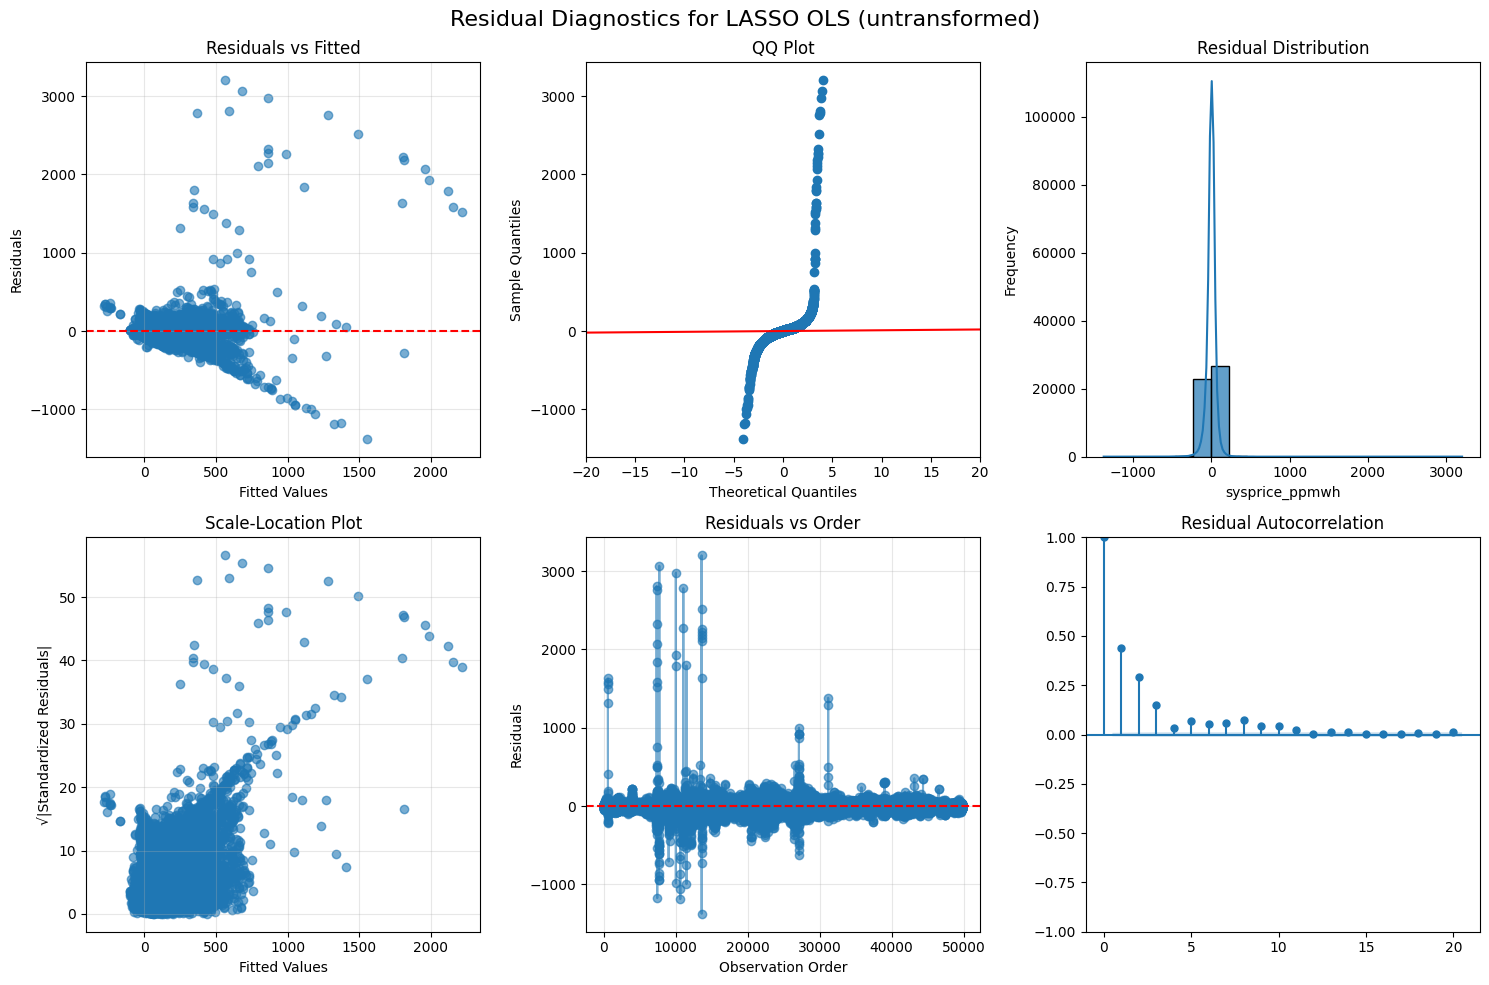

In [ ]:
print("\n" + "="*80)
print("Lasso OLS (untransformed) Model: Residual Diagnostics")
print("="*80)

# Calculate residuals for the training data from the LASSO model
lasso_base_residuals = Y_base_train - y_pred_base_lasso_train
lasso_base_fitted_values = y_pred_base_lasso_train

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Residual Diagnostics for LASSO OLS (untransformed)', fontsize=16)

# Residuals vs Fitted
axes[0, 0].scatter(lasso_base_fitted_values, lasso_base_residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].grid(True, alpha=0.3)

# QQ-Plot
from scipy import stats
sm.qqplot(lasso_base_residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_xlim(-20, 20)
axes[0, 1].set_title('QQ Plot')


# Residual Histogram
sns.histplot(lasso_base_residuals, kde=True, bins=20, edgecolor='black', alpha=0.7, ax=axes[0, 2]) # Added kde=Trueaxes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Residual Distribution')

# Scale-Location Plot
axes[1, 0].scatter(lasso_base_fitted_values, np.sqrt(np.abs(lasso_base_residuals)), alpha=0.6)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot')
axes[1, 0].grid(True, alpha=0.3)

# Residuals vs Order (assuming time series order is preserved in Y_V1_train index)
axes[1, 1].plot(range(len(lasso_base_residuals)), lasso_base_residuals, 'o-', alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Observation Order')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Order')
axes[1, 1].grid(True, alpha=0.3)

# ACF of Residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(lasso_base_residuals, lags=20, ax=axes[1, 2], alpha=0.05)
axes[1, 2].set_title('Residual Autocorrelation')

plt.tight_layout()
plt.show()

### **Summary of OLS vs LASSO on Untransformed (Base) Data**

### 1. Performance Metrics (R2 and MAE):
| Model                    | Metric      | Training Set | Test Set    | Notes                                                                                                                       |
| :----------------------- | :---------- | :----------- | :---------- | :-------------------------------------------------------------------------------------------------------------------------- |
| **OLS (Untransformed)**  | R-squared   | 0.6311       | 0.5927      | Explains a good portion of variance in training, with a slight drop in test, indicating decent generalization.             |
|                          | MAE (£)     | 39.56        | 22.81       | On average, predictions are off by ~£22.81 in the test set.                                                                 |
| **LASSO (Untransformed)** | R-squared   | 0.6286       | 0.6102      | Slightly lower R2 on training than OLS, but marginally higher on the test set, suggesting slightly better generalization. |
|                          | MAE (£)     | 39.64        | 21.48       | Slightly lower (better) MAE on the test set compared to OLS.                                                                |

**Summary of Metrics:**
*   **R-squared:** Both OLS and LASSO models on the untransformed data demonstrate similar and relatively strong explanatory power, with R-squared values around 63% on the training set and 59-61% on the test set. LASSO shows a minor improvement in test R-squared, suggesting it might generalize slightly better due to regularization.
*   **MAE:** The Mean Absolute Error values are also very close, with LASSO performing marginally better on the test set (£21.48 vs £22.81 for OLS). This indicates that, on average, LASSO's predictions are slightly closer to the actual values for unseen data.

### 2. Feature Selection (LASSO Specific):
*   **OLS:** Uses all 15 predictor variables.
*   **LASSO:** From cell `IQdX9GV0bIkR`, LASSO kept only 6 variables (`gasprice_ppmwh`, `marketindexprice_ppmwh`, `deratedmargin_mw`, `gen_biomass_mw`, `gen_nuclear_mw`, `gen_solar_mw`) and dropped 9. This is a significant reduction in model complexity, improving interpretability and potentially reducing noise, while still maintaining comparable or even slightly better predictive performance on the test set.

### 3. Diagnostic Tests:
Both the OLS and LASSO models on the untransformed data continue to show significant violations of classical linear model assumptions, as detailed in cell `8c7e7218` for OLS and visually confirmed for LASSO in cell `as0jJ1aB2I4A` (and quantified by the statistical tests within that cell for LASSO).

| Diagnostic Test         | OLS (Untransformed)     | LASSO (Untransformed)       | Implications for Both Models                                                                                                                                                                                                                                                                                                |
| :---------------------- | :---------------------- | :-------------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Durbin-Watson**       | 1.128                   | 1.128 (calculated on residuals) | **Strong positive autocorrelation:** Values significantly below 2 indicate that consecutive errors are positively correlated, a common issue in time-series data, meaning temporal dependencies are not fully captured.                                                                        |
| **Jarque-Bera Test (p-value)** | 0.000 (Reject H0)       | 0.000 (Reject H0)           | **Severe non-normality:** Overwhelmingly rejects normality, with extremely high skewness (OLS: 11.076, LASSO: similar) and kurtosis (OLS: 392.331, LASSO: similar), pointing to distributions with many extreme outliers and heavy tails. This makes statistical inferences unreliable. |
| **Breusch-Pagan Test (p-value)** | 0.000 (Reject H0)       | 0.000 (Reject H0)           | **Heteroscedasticity:** Rejects homoscedasticity, indicating the variance of residuals is not constant. This leads to inefficient coefficient estimates and unreliable standard errors.                                                                                        |
| **Rainbow Test (p-value)** | 0.000 (Reject H0)       | Not directly applicable (N/A) | **Non-linearity:** For OLS, indicates a significant departure from linearity. This suggests simple linear relationships are insufficient. LASSO also likely suffers from unaddressed non-linear relationships. |

**Overall Conclusion on Untransformed Data Models:**

While the untransformed models (both OLS and LASSO) achieve a higher R-squared compared to their V1 transformed counterparts and effectively address multicollinearity (low condition number of 7.11 for OLS in cell `bxE5bohRtL_4`), they still exhibit critical violations of OLS assumptions:

*   **Persistent Time-Series Dependence:** Strong positive autocorrelation remains, indicating that the models are not fully capturing the time-dependent patterns in the data.
*   **Extreme Non-Normality and Outliers:** The residuals are highly non-normal with severe skewness and kurtosis, suggesting numerous outliers. This invalidates standard statistical inferences.
*   **Heteroscedasticity:** The variance of the errors is not constant, affecting the efficiency of coefficient estimates and the reliability of standard errors.
*   **Non-Linearity:** Both models struggle with capturing the true underlying non-linear relationships in the data.

Despite LASSO's slight advantage in test set performance and its valuable feature selection capability (reducing model complexity), neither linear model on the untransformed data fully addresses the fundamental statistical challenges posed by the dataset's characteristics. This points to the need for more sophisticated modeling techniques that can better handle time-series properties, non-normality, and non-linear relationships, such as advanced time-series models or machine learning algorithms designed for complex data patterns.

## M3: Plot y_predict vs y_actual from OLS, and LASSO for

In [ ]:
import statsmodels.api as sm

# 1. Add the constant column to your scaled test data
X_test_with_const = sm.add_constant(X_base_test_scaled)

# 2. Verify the new shape (should be (17456, 16))
print(f"New shape: {X_test_with_const.shape}")

# 3. Run the prediction
Y_pred = ols_base_model.predict(X_test_with_const)

New shape: (17456, 16)


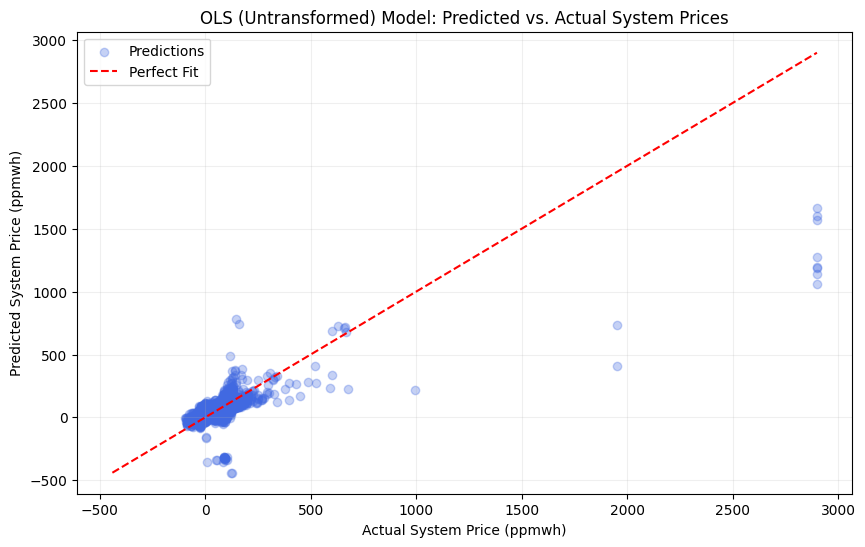

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_base_test, Y_pred, alpha=0.3, color='royalblue', label='Predictions')

# Add the 'Perfect Prediction' 45-degree line to see where the model is under or over-predicting
max_val = max(Y_base_test.max(), Y_pred.max())
min_val = min(Y_base_test.min(), Y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual System Price (ppmwh)')
plt.ylabel('Predicted System Price (ppmwh)')
plt.title('OLS (Untransformed) Model: Predicted vs. Actual System Prices')

# 3. Run the prediction
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

In [ ]:
#plot for lasso

y_pred_lasso = lasso_basedata.predict(X_base_test_scaled)

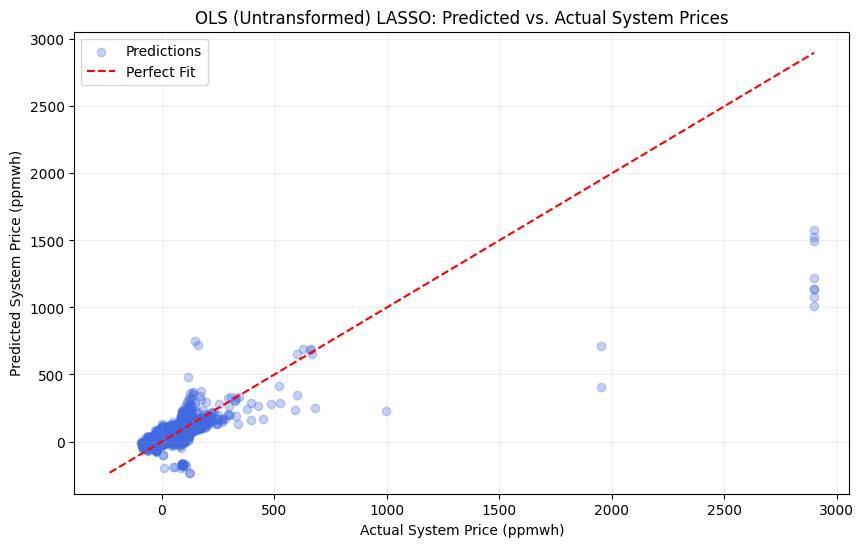

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_base_test, y_pred_lasso, alpha=0.3, color='royalblue', label='Predictions')

# Add the 'Perfect Prediction' 45-degree line to see where the model is under or over-predicting
max_val = max(Y_base_test.max(), y_pred_lasso.max())
min_val = min(Y_base_test.min(), y_pred_lasso.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual System Price (ppmwh)')
plt.ylabel('Predicted System Price (ppmwh)')
plt.title('OLS (Untransformed) LASSO: Predicted vs. Actual System Prices')

# 3. Run the prediction
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

## M3: Split into normal (SysPrice<=£150) vs stress events (SysPrice > £150)**

In [ ]:
train_base_normal = train_base_df[train_base_df['sysprice_ppmwh'] <= 150]
train_base_stress = train_base_df[train_base_df['sysprice_ppmwh'] > 150]
test_base_normal = test_base_df[test_base_df['sysprice_ppmwh'] <= 150]
test_base_stress = test_base_df[test_base_df['sysprice_ppmwh'] > 150]

In [ ]:
print(f"Normal Training Set Shape: {train_base_normal.shape}")
print(f"Stress Training Set Shape: {train_base_stress.shape}")
print(f"Normal Testing Set Shape:  {test_base_normal.shape}")
print(f"Stress Testing Set Shape:  {test_base_stress.shape}")

Normal Training Set Shape: (34260, 16)
Stress Training Set Shape: (15546, 16)
Normal Testing Set Shape:  (17011, 16)
Stress Testing Set Shape:  (445, 16)


In [ ]:
X_train_base_normal = train_base_normal.drop('sysprice_ppmwh', axis=1)
Y_train_base_normal = train_base_normal['sysprice_ppmwh']
X_test_base_normal = test_base_normal.drop('sysprice_ppmwh', axis=1)
Y_test_base_normal = test_base_normal['sysprice_ppmwh']
X_train_base_stress = train_base_stress.drop('sysprice_ppmwh', axis=1)
Y_train_base_stress = train_base_stress['sysprice_ppmwh']
X_test_base_stress = test_base_stress.drop('sysprice_ppmwh', axis=1)
Y_test_base_stress = test_base_stress['sysprice_ppmwh']

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test sets
X_train_base_normal_scaled = scaler.fit_transform(X_train_base_normal)
X_test_base_normal_scaled = scaler.transform(X_test_base_normal)
X_train_base_stress_scaled = scaler.fit_transform(X_train_base_stress)
X_test_base_stress_scaled = scaler.transform(X_test_base_stress)

In [ ]:
# OLS for normal
# Add a constant term to include the intercept in the model
X_train_base_normal_scaled_const = sm.add_constant(X_train_base_normal_scaled)
X_test_base_normal_scaled_const = sm.add_constant(X_test_base_normal_scaled)

# Fit the OLS model
ols_base_normal = sm.OLS(Y_train_base_normal, X_train_base_normal_scaled_const).fit()

print("✅ OLS Regression Model for base data, normal events fitted successfully!\n")


#OLS for stress events
# Add a constant term to include the intercept in the model
X_train_base_stress_scaled_const = sm.add_constant(X_train_base_stress_scaled)
X_test_base_stress_scaled_const = sm.add_constant(X_test_base_stress_scaled)

#Fit the OLS model for stress events
ols_base_stress = sm.OLS(Y_train_base_stress, X_train_base_stress_scaled_const).fit()

print("✅ OLS Regression Model for base data, stress events fitted successfully!\n")

✅ OLS Regression Model for base data, normal events fitted successfully!

✅ OLS Regression Model for base data, stress events fitted successfully!



In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
# Display model summary for base_normal
print("✅ Results for OLS Regression Model for untransformed data, normal events\n")
ols_base_normal_summary = ols_base_normal.summary()
print(ols_base_normal_summary)

# Generate Predictions
train_base_normal_preds = ols_base_normal.predict(X_train_base_normal_scaled_const)
test_base_normal_preds = ols_base_normal.predict(X_test_base_normal_scaled_const)

# Calculate Metrics
train_r2_normal = r2_score(Y_train_base_normal, train_base_normal_preds)
train_mae_normal = mean_absolute_error (Y_train_base_normal, train_base_normal_preds)
test_r2_normal = r2_score(Y_test_base_normal, test_base_normal_preds)
test_mae_normal = mean_absolute_error(Y_test_base_normal, test_base_normal_preds)

# Print Results
print(f"--- R2 for OLS (untransformed), normal events ---")
print(f"Train R2:  {train_r2_normal:.4f} | Train MAE: £{train_mae_normal:.2f}")
print(f"Test R2:   {test_r2_normal:.4f} | Test MAE:  £{test_mae_normal:.2f}")
print("-" * 30)

# Display model summary for base_stress
print("✅ Results for OLS Regression Model for untransformed data, stress events\n")
ols_base_stress_summary = ols_base_stress.summary()
print(ols_base_stress_summary)

# Generate Predictions
train_base_stress_preds = ols_base_stress.predict(X_train_base_stress_scaled_const)
test_base_stress_preds = ols_base_stress.predict(X_test_base_stress_scaled_const)

# Calculate Metrics
train_r2_stress = r2_score(Y_train_base_stress, train_base_stress_preds)
train_mae_stress = mean_absolute_error(Y_train_base_stress, train_base_stress_preds)
test_r2_stress = r2_score(Y_test_base_stress, test_base_stress_preds)
test_mae_stress = mean_absolute_error(Y_test_base_stress, test_base_stress_preds)

# Print Results
print(f"--- R2 for OLS (untransformed), stress events ---")
print(f"Train R2:  {train_r2_stress:.4f} | Train MAE: £{train_mae_stress:.2f}")
print(f"Test R2:   {test_r2_stress:.4f} | Test MAE:  £{test_mae_stress:.2f}")
print("-" * 30)

✅ Results for OLS Regression Model for untransformed data, normal events

                            OLS Regression Results                            
Dep. Variable:         sysprice_ppmwh   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1194.
Date:                Sat, 03 Jan 2026   Prob (F-statistic):               0.00
Time:                        16:00:35   Log-Likelihood:            -1.7062e+05
No. Observations:               34260   AIC:                         3.413e+05
Df Residuals:                   34244   BIC:                         3.414e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

### **Comparative Analysis: M3 (Untransformed) vs. M2 (Transformed) Models for Normal and Stress Events**

To compare the performance of the OLS models on untransformed (M3) and V1 transformed (M2) data, we'll look at their R-squared (R2) and Mean Absolute Error (MAE) metrics for both normal (`sysprice_ppmwh <= 150`) and stress (`sysprice_ppmwh > 150`) event subsets.

#### **1. Normal Events (System Price <= £150)**

| Model | Metric      | Training Set | Test Set | Notes                                                                      |
| :---- | :---------- | :----------- | :------- | :------------------------------------------------------------------------- |
| **M3 OLS** | R-squared   | 0.3434       | 0.4631   | Explains a moderate amount of variance, with better performance on test data, potentially due to less variability in the normal events. |
|       | MAE (£)     | 28.02        | 24.68    | Predictions are off by about £24.68 on the test set.                       |
| **M2 OLS** | R-squared   | 0.4259       | 0.5418   | Higher R-squared than M3, indicating better variance explanation.          |
|       | MAE (£)     | 26.11        | 22.10    | Lower MAE than M3, suggesting slightly more accurate predictions.          |

**Interpretation for Normal Events:**
For normal market conditions, the **M2 (V1 Transformed) OLS model outperforms the M3 (Untransformed) OLS model**. It achieves higher R-squared values on both training and test sets, and a lower Mean Absolute Error, particularly on the test set. This suggests that the V1 transformations applied in M2 are beneficial for modeling system prices during normal periods.

#### **2. Stress Events (System Price > £150)**

| Model | Metric      | Training Set | Test Set | Notes                                                                      |
| :---- | :---------- | :----------- | :------- | :------------------------------------------------------------------------- |
| **M3 OLS** | R-squared   | 0.5564       | 0.6959   | Explains a significant portion of variance, performing even better on the test set. |
|       | MAE (£)     | 51.12        | 81.17    | Predictions are off by a larger margin, reflecting the higher variability of stress events. |
| **M2 OLS** | R-squared   | 0.3798       | 0.4641   | Significantly lower R-squared compared to M3 for stress events.            |
|       | MAE (£)     | 57.71        | 78.73    | Higher MAE on training, but slightly lower on test than M3.                |

**Interpretation for Stress Events:**
Conversely, for stress market conditions, the **M3 (Untransformed) OLS model significantly outperforms the M2 (V1 Transformed) OLS model** in terms of R-squared. While M2 has a slightly lower MAE on the test set for stress events, the R-squared difference is substantial, indicating that the untransformed features are better at capturing the variance during these high-price periods. The transformations in M2 seem to hinder the model's ability to explain the data during stress events.

#### **Overall Conclusion:**

*   **M2 (V1 Transformed) is generally better for predicting normal market events**, showing improved R-squared and lower MAE compared to M3. The transformations help stabilize relationships during typical operating conditions.
*   **M3 (Untransformed) is better for predicting stress market events**, demonstrating a much higher R-squared, suggesting that the original scale of the features is more effective in capturing the dynamics of high-volatility price spikes. The transformations appear to dampen or distort the strong signals present during these events.

This bifurcated performance suggests that a single linear model (whether transformed or not) might not be optimal for both normal and stress conditions. Future modeling efforts could explore using different models or modeling approaches specifically tailored to each regime, or employing models that are more robust to extreme values and non-linearities, which are likely present during stress events.

# **M2: Linear model for Transformed V1 data Con't** (Leah)

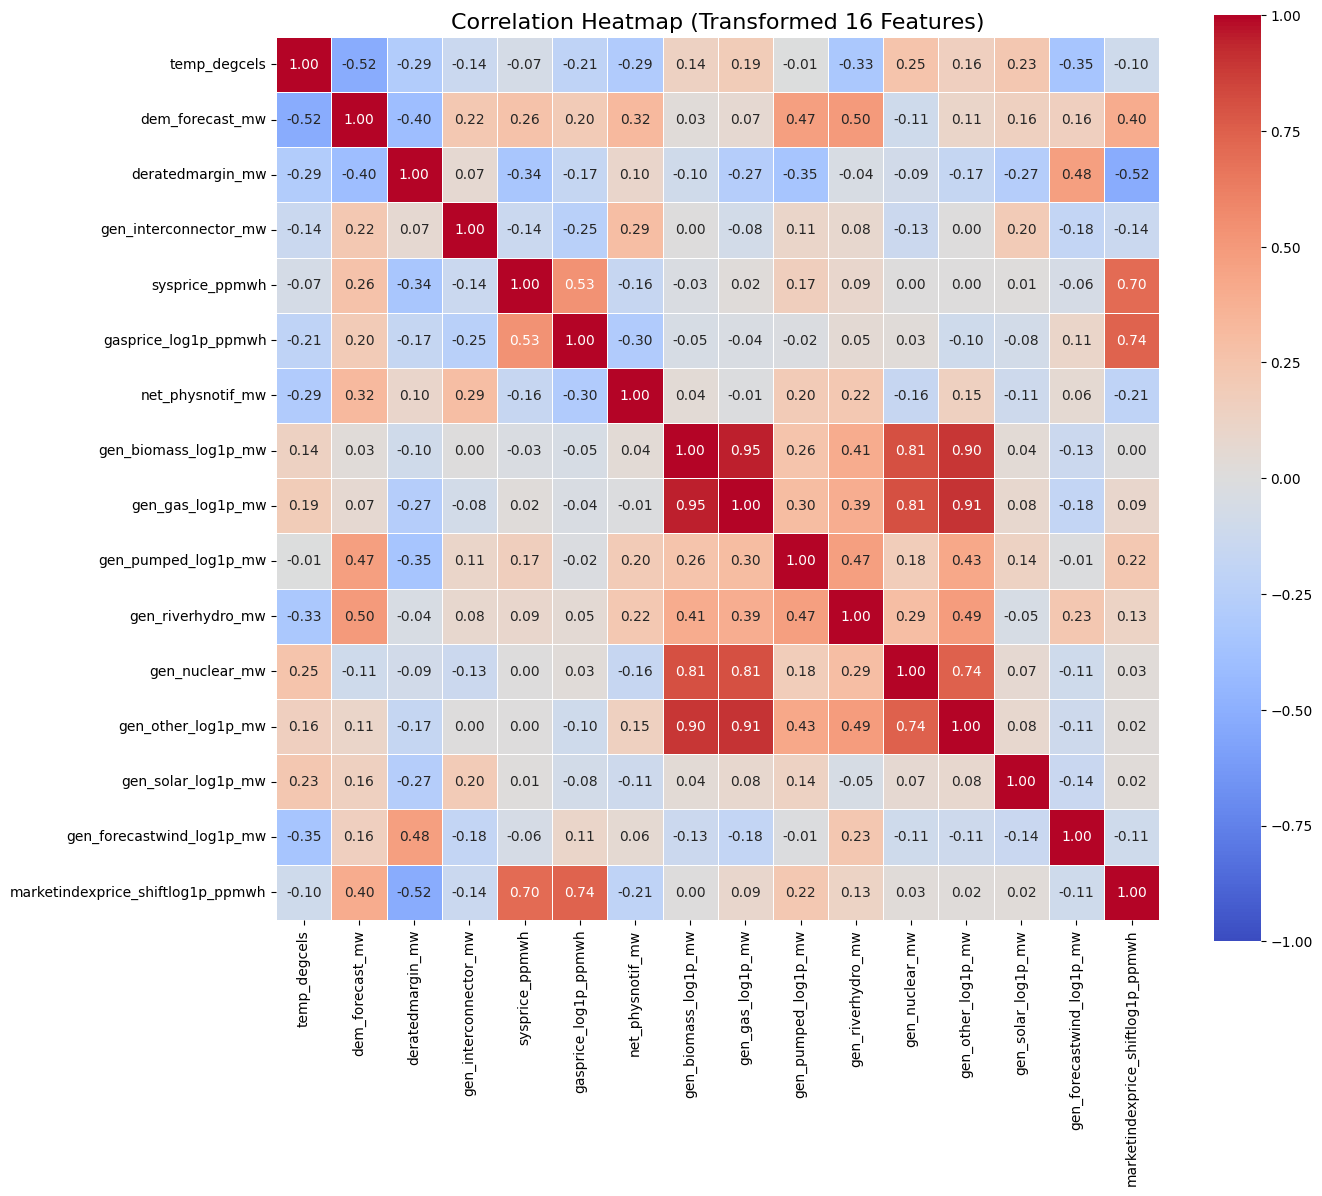

In [ ]:
v1_df = pd.read_csv(r'/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/modelling_transformed_V1_dataset_datetimeindex.csv')
numerical_v1_df = v1_df.select_dtypes(include=['number'])
corr_matrix = numerical_v1_df.corr()

#replot heatmap
plt.figure(figsize=(14, 12))  # Large size to make labels readable
sns.heatmap(
    corr_matrix,
    annot=True,       # Show the numbers on the boxes
    fmt=".2f",        # Format to 2 decimal places
    cmap='coolwarm',  # Red = Positive, Blue = Negative
    center=0,         # Center color map at 0
    vmin=-1, vmax=1,  # Fix scale from -1 to 1
    linewidths=0.5,   # Add white lines between squares
    square=True       # Force squares for better aspect ratio
)

plt.title(f"Correlation Heatmap (Transformed {len(numerical_v1_df.columns)} Features)", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
train_transV1_df = pd.read_csv(r'/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/train_transformed_V1_data.csv')
test_transV1_df = pd.read_csv(r'/content/drive/MyDrive/Energy Data Analysis Group 3 Coursework/data/Feature engineering and transformation/test_transformed_V1_data.csv')

In [ ]:
train_transV1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49806 entries, 0 to 49805
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temp_degcels                       49806 non-null  float64
 1   dem_forecast_mw                    49806 non-null  int64  
 2   deratedmargin_mw                   49806 non-null  float64
 3   gen_interconnector_mw              49806 non-null  int64  
 4   sysprice_ppmwh                     49806 non-null  float64
 5   gasprice_log1p_ppmwh               49806 non-null  float64
 6   net_physnotif_mw                   49806 non-null  int64  
 7   gen_biomass_log1p_mw               49806 non-null  float64
 8   gen_gas_log1p_mw                   49806 non-null  float64
 9   gen_pumped_log1p_mw                49806 non-null  float64
 10  gen_riverhydro_mw                  49806 non-null  int64  
 11  gen_nuclear_mw                     49806 non-null  int

In [ ]:
X_V1_train = train_transV1_df.drop('sysprice_ppmwh', axis=1)
Y_V1_train = train_transV1_df['sysprice_ppmwh']
X_V1_test = test_transV1_df.drop('sysprice_ppmwh', axis=1)
Y_V1_test = test_transV1_df['sysprice_ppmwh']
print(f"X_V1 train shape: {X_V1_train.shape}")
print(f"X_V1 test shape: {X_V1_test.shape}")
print(f"Y_V1 train shape: {Y_V1_train.shape}")
print(f"Y_V1 test shape: {Y_V1_test.shape}")

# Display the first few rows of each
print("🔹 Predictor Variables (X):")
display(X_V1_train.head())

print("\n Target Variable (Y):")
display(Y_V1_train.head())

X_V1 train shape: (49806, 15)
X_V1 test shape: (17456, 15)
Y_V1 train shape: (49806,)
Y_V1 test shape: (17456,)
🔹 Predictor Variables (X):


temp_degcels  dem_forecast_mw  deratedmargin_mw  gen_interconnector_mw  \
0          16.0            21570         16747.967                   3048   
1          16.0            21130         18460.330                   3296   
2          16.0            21272         18928.482                   3002   
3          16.0            21600         18602.447                   3078   
4          16.0            21478         18226.246                   2876   

   gasprice_log1p_ppmwh  net_physnotif_mw  gen_biomass_log1p_mw  \
0              2.811208              -693              7.170888   
1              2.811208               455              7.037906   
2              2.818995               180              7.069023   
3              2.818995               -45              7.063904   
4              2.863914              -495              7.284135   

   gen_gas_log1p_mw  gen_pumped_log1p_mw  gen_riverhydro_mw  gen_nuclear_mw  \
0          8.733916                  0.0                723            4898   
1          8.664751                  0.0                723            4884   
2          8.675564                  0.0                721            4895   
3          8.540910                  0.0                720            4894   
4          8.525955                  0.0                704            4894   

   gen_other_log1p_mw  gen_solar_log1p_mw  gen_forecastwind_log1p_mw  \
0            5.036953                 0.0                   8.771166   
1            5.017280                 0.0                   8.732182   
2            5.093750                 0.0                   8.891729   
3            5.003946                 0.0                   8.937088   
4            5.010635                 0.0                   8.926466   

   marketindexprice_shiftlog1p_ppmwh  
0                           4.887337  
1                           4.828474  
2                           4.798184  
3                           4.827834  
4                           4.863217


 Target Variable (Y):


0    63.90000
1    36.40000
2    35.05000
3    43.25011
4    41.00000
Name: sysprice_ppmwh, dtype: float64

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test sets
X_V1_train_scaled = scaler.fit_transform(X_V1_train)
X_V1_test_scaled = scaler.transform(X_V1_test)

# Display first 5 scaled values
print("✅ Feature scaling completed successfully!")
print("\n🔹 Scaled BASE Training Data (first 5 rows):")
print(X_V1_train_scaled[:5])

✅ Feature scaling completed successfully!

🔹 Scaled BASE Training Data (first 5 rows):
[[ 0.73268313 -0.8799644   0.66628721  0.38502545 -1.74051932 -1.28264603
   0.16733425  0.08126706 -0.86618952  1.42849206  0.40809177  0.00736316
  -1.00098393  0.36722213 -1.00175592]
 [ 0.73268313 -0.95316545  0.96004325  0.46605224 -1.74051932 -1.0505065
   0.09972415  0.05277887 -0.86618952  1.42849206  0.39823197 -0.00570629
  -1.00098393  0.32324889 -1.1535474 ]
 [ 0.73268313 -0.92954148  1.04035477  0.36999629 -1.72601285 -1.10611483
   0.11554469  0.05723249 -0.86618952  1.42074922  0.40597896  0.04509621
  -1.00098393  0.50321236 -1.23165484]
 [ 0.73268313 -0.87497342  0.98442344  0.39482708 -1.72601285 -1.15161256
   0.11294188  0.00177063 -0.86618952  1.4168778   0.40527469 -0.01456431
  -1.00098393  0.55437594 -1.15519804]
 [ 0.73268313 -0.89527008  0.91988612  0.32882946 -1.64233151 -1.24260803
   0.22491021 -0.00438912 -0.86618952  1.35493505  0.40527469 -0.01012054
  -1.00098393  0.5

## M2: Model, diagnostic Tests and Evaluation Metrics

In [ ]:
X_V1_scaled_df = pd.DataFrame(
    X_V1_train_scaled,
    columns=X_V1_train.columns,
    index=X_V1_train.index
)

# Add a constant term to include the intercept in the model
X_V1_train_const = sm.add_constant(X_V1_scaled_df)

# Fit the OLS model
ols_V1_model = sm.OLS(Y_V1_train, X_V1_train_const).fit()

# Display model summary
print("✅ OLS Regression Model Fitted Successfully!\n")
ols_V1_model_summary = ols_V1_model.summary()
print(ols_V1_model_summary)

✅ OLS Regression Model Fitted Successfully!

                            OLS Regression Results                            
Dep. Variable:         sysprice_ppmwh   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     3372.
Date:                Sat, 03 Jan 2026   Prob (F-statistic):               0.00
Time:                        16:07:56   Log-Likelihood:            -2.9538e+05
No. Observations:               49806   AIC:                         5.908e+05
Df Residuals:                   49790   BIC:                         5.909e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm

X_V1_test_const = sm.add_constant(X_V1_test_scaled)

# Generate Predictions for the full V1 transformed data
train_v1_preds = ols_V1_model.predict(X_V1_train_const)
test_v1_preds = ols_V1_model.predict(X_V1_test_const)

# Calculate Metrics for the full V1 transformed data
train_r2_v1 = r2_score(Y_V1_train, train_v1_preds)
train_mae_v1 = mean_absolute_error(Y_V1_train, train_v1_preds)
test_r2_v1 = r2_score(Y_V1_test, test_v1_preds)
test_mae_v1 = mean_absolute_error(Y_V1_test, test_v1_preds)

# Print Results
print(f"--- Evaluation Metrics for OLS M2 Transformed Data (Full Dataset) ---")
print(f"Train R2:  {train_r2_v1:.4f} | Train MAE: £{train_mae_v1:.2f}")
print(f"Test R2:   {test_r2_v1:.4f} | Test MAE:  £{test_mae_v1:.2f}")

--- Evaluation Metrics for OLS M2 Transformed Data (Full Dataset) ---
Train R2:  0.5040 | Train MAE: £43.12
Test R2:   0.3308 | Test MAE:  £26.73


In [ ]:
# Get the original column names from X_train
V1_feature_names = X_V1_train.columns.tolist()

# Prepend 'const' for the intercept term
ols_V1_variable_map = ['const'] + V1_feature_names

# Print the mapping
print("OLS Regression V1 Variable Mapping:")
for i, var_name in enumerate(ols_V1_variable_map):
    if i == 0:
        print(f"const: {var_name}")
    else:
        print(f"x{i}: {var_name}")

OLS Regression V1 Variable Mapping:
const: const
x1: temp_degcels
x2: dem_forecast_mw
x3: deratedmargin_mw
x4: gen_interconnector_mw
x5: gasprice_log1p_ppmwh
x6: net_physnotif_mw
x7: gen_biomass_log1p_mw
x8: gen_gas_log1p_mw
x9: gen_pumped_log1p_mw
x10: gen_riverhydro_mw
x11: gen_nuclear_mw
x12: gen_other_log1p_mw
x13: gen_solar_log1p_mw
x14: gen_forecastwind_log1p_mw
x15: marketindexprice_shiftlog1p_ppmwh



OLS (Transformed) MODEL DIAGNOSTICS


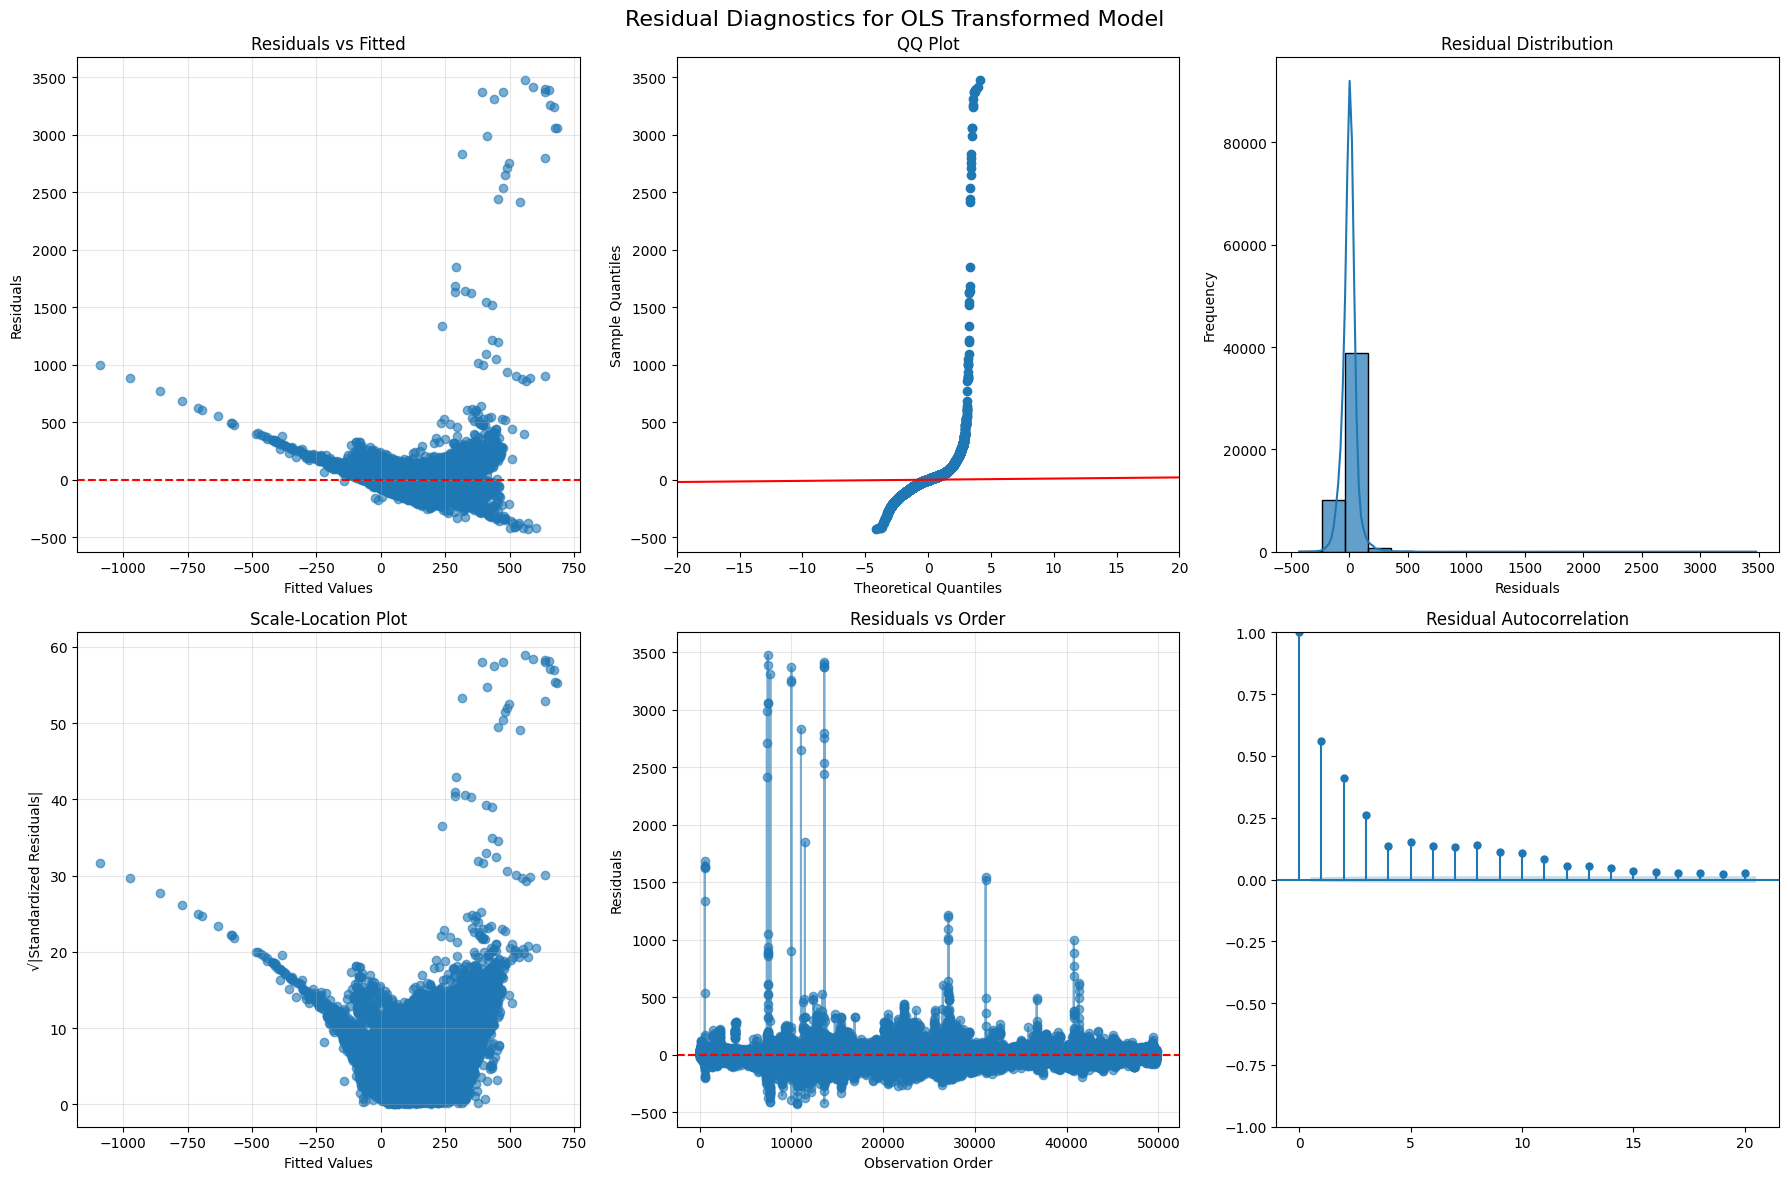


Diagnostic Tests:
----------------------------------------
Durbin-Watson: 0.878
Interpretation: Values near 2 indicate no autocorrelation
   < 1.5: Positive autocorrelation
   1.5-2.5: No autocorrelation
   > 2.5: Negative autocorrelation

Jarque-Bera Test: Stat = 707194234.640, p-value = 0.000
Skewness: 17.749, Kurtosis: 585.679
H0: Residuals are normally distributed
Conclusion: Reject H0 (non-normal)

Breusch-Pagan Test: LM = 1058.906, p-value = 0.000
H0: Homoscedasticity (constant variance)
Conclusion: Reject H0 (heteroscedastic)

Rainbow Test: F = 1.045, p-value = 0.000
H0: Model is correctly specified (linear)
Conclusion: Reject H0 (non-linear)


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.diagnostic import het_breuschpagan, linear_rainbow
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for KDE in histogram
import numpy as np # Import numpy for sqrt

# Comprehensive diagnostic analysis
print("\n" + "="*80)
print("OLS (Transformed) MODEL DIAGNOSTICS")
print("="*80)

# 3.1 Residual Analysis
V1_residuals = ols_V1_model.resid  # residuals from the fitted OLS model
V1_fitted_values = ols_V1_model.fittedvalues  # predicted (fitted) values

fig, axes = plt.subplots(2, 3, figsize=(18, 12)) # Increased figure size for better visibility
fig.suptitle('Residual Diagnostics for OLS Transformed Model', fontsize=16)

# Residuals vs Fitted
axes[0, 0].scatter(V1_fitted_values, V1_residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].grid(True, alpha=0.3)

# QQ-Plot
sm.qqplot(V1_residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_title('QQ Plot')
axes[0, 1].set_xlim(-20, 20) # Set x-axis limits for the QQ plot as requested

# Residual Histogram with KDE
sns.histplot(V1_residuals, kde=True, bins=20, edgecolor='black', alpha=0.7, ax=axes[0, 2]) # Added kde=True
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Residual Distribution')

# Scale-Location Plot
axes[1, 0].scatter(V1_fitted_values, np.sqrt(np.abs(V1_residuals)), alpha=0.6)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot')
axes[1, 0].grid(True, alpha=0.3)

# Residuals vs Order
axes[1, 1].plot(range(len(V1_residuals)), V1_residuals, 'o-', alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Observation Order')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Order')
axes[1, 1].grid(True, alpha=0.3)

# ACF of Residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(V1_residuals, lags=20, ax=axes[1, 2], alpha=0.05)
axes[1, 2].set_title('Residual Autocorrelation')

plt.tight_layout()
plt.show()

# 3.2 Statistical Tests for Assumptions
print("\nDiagnostic Tests:")
print("-" * 40)

# Durbin-Watson for autocorrelation
dw_stat = durbin_watson(V1_residuals)
print(f"Durbin-Watson: {dw_stat:.3f}")
print("Interpretation: Values near 2 indicate no autocorrelation")
print("   < 1.5: Positive autocorrelation")
print("   1.5-2.5: No autocorrelation")
print("   > 2.5: Negative autocorrelation")

# Jarque-Bera for normality
jb_stat, jb_pvalue, skew, kurtosis = jarque_bera(V1_residuals)
print(f"\nJarque-Bera Test: Stat = {jb_stat:.3f}, p-value = {jb_pvalue:.3f}")
print(f"Skewness: {skew:.3f}, Kurtosis: {kurtosis:.3f}")
print("H0: Residuals are normally distributed")
print(f"Conclusion: {'Fail to reject H0 (normality)' if jb_pvalue > 0.05 else 'Reject H0 (non-normal)'}")

# Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(V1_residuals, X_V1_train_const)
print(f"\nBreusch-Pagan Test: LM = {bp_test[0]:.3f}, p-value = {bp_test[1]:.3f}")
print("H0: Homoscedasticity (constant variance)")
print(f"Conclusion: {'Fail to reject H0 (homoscedastic)' if bp_test[1] > 0.05 else 'Reject H0 (heteroscedastic)'}")

# Rainbow test for linearity
rainbow_stat, rainbow_pval = linear_rainbow(ols_V1_model)
print(f"\nRainbow Test: F = {rainbow_stat:.3f}, p-value = {rainbow_pval:.3f}")
print("H0: Model is correctly specified (linear)")
print(f"Conclusion: {'Fail to reject H0 (linear)' if rainbow_pval > 0.05 else 'Reject H0 (non-linear)'}")

## M2: Lasso Regression

### **Summary of Diagnostic Test Results for M2 Transformed Data (OLS)**

The diagnostic tests for the M2 transformed data OLS model indicate severe violations of classical linear model assumptions: **strong positive autocorrelation** (Durbin-Watson = 0.878), **extreme non-normality of residuals** (Jarque-Bera p-value = 0.000, high skew and kurtosis), **heteroscedasticity** (Breusch-Pagan p-value = 0.000), and **non-linearity** (Rainbow Test p-value = 0.000). These issues compromise the statistical validity of the model's inferences, despite addressing multicollinearity.

In [ ]:
from sklearn.linear_model import LassoCV

#Run LASSO with Cross-Validation to find the best penalty (alpha)
lasso_v1 = LassoCV(cv=5, random_state=42).fit(X_V1_scaled_df, Y_V1_train)

# Check which variables survived
lasso_v1_coeffs = pd.Series(lasso_v1.coef_, index=X_V1_train.columns)
print("Variables kept in M2 transformed by LASSO:")
print(lasso_v1_coeffs[lasso_v1_coeffs != 0])

print(f"\nVariables dropped for M2 transformed model: {sum(lasso_v1_coeffs == 0)}")

# Compare performance
print(f"V1 Trans Lasso Training R^2: {lasso_v1.score(X_V1_train_scaled, Y_V1_train):.4f}")
print(f"V1 Trans Lasso Test R^2: {lasso_v1.score(X_V1_test_scaled, Y_V1_test):.4f}")

Variables kept in M2 transformed by LASSO:
dem_forecast_mw                      -1.402331
deratedmargin_mw                      1.784180
gen_interconnector_mw                -4.781692
gasprice_log1p_ppmwh                  0.222910
net_physnotif_mw                     -0.791268
gen_gas_log1p_mw                    -16.767068
gen_pumped_log1p_mw                   4.334164
gen_other_log1p_mw                   11.314524
gen_forecastwind_log1p_mw            -1.038551
marketindexprice_shiftlog1p_ppmwh    90.211811
dtype: float64

Variables dropped for M2 transformed model: 5
V1 Trans Lasso Training R^2: 0.5029
V1 Trans Lasso Test R^2: 0.3339


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Generate predictions for training and test sets using the fitted LassoCV model
y_pred_V1_lasso_train = lasso_v1.predict(X_V1_train_scaled)
y_pred_V1_lasso_test = lasso_v1.predict(X_V1_test_scaled)

# Calculate R2 and MAE for the training set
train_r2_V1_lasso = r2_score(Y_V1_train, y_pred_V1_lasso_train)
train_mae_V1_lasso = mean_absolute_error(Y_V1_train, y_pred_V1_lasso_train)

# Calculate R2 and MAE for the test set
test_r2_V1_lasso = r2_score(Y_V1_test, y_pred_V1_lasso_test)
test_mae_V1_lasso = mean_absolute_error(Y_V1_test, y_pred_V1_lasso_test)

print("--- Evaluation Metrics for LASSO M2 Transformed Data ---")
print(f"Train R2:  {train_r2_V1_lasso:.4f} | Train MAE: £{train_mae_V1_lasso:.2f}")
print(f"Test R2:   {test_r2_V1_lasso:.4f} | Test MAE:  £{test_mae_V1_lasso:.2f}")
print("-" * 50)

--- Evaluation Metrics for LASSO M2 Transformed Data ---
Train R2:  0.5029 | Train MAE: £43.05
Test R2:   0.3339 | Test MAE:  £25.73
--------------------------------------------------



LASSO OLS Transformed Model: Residual Diagnostics


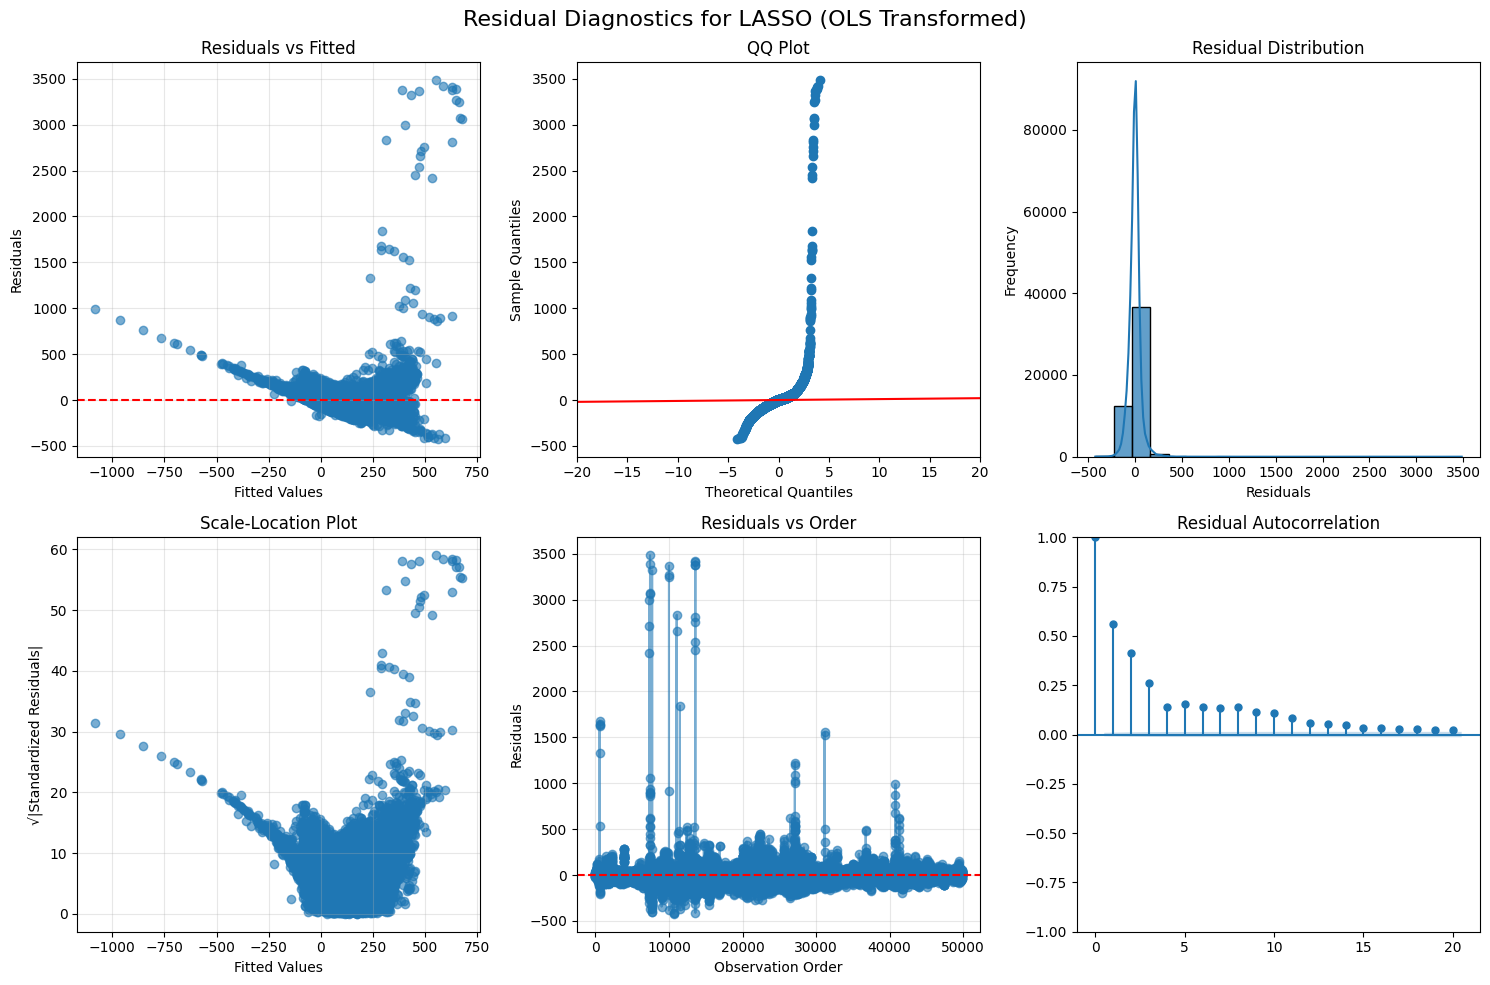

In [ ]:
print("\n" + "="*80)
print("LASSO OLS Transformed Model: Residual Diagnostics")
print("="*80)

# Calculate residuals for the training data from the LASSO model
lasso_V1_residuals = Y_V1_train - y_pred_V1_lasso_train
lasso_V1_fitted_values = y_pred_V1_lasso_train

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Residual Diagnostics for LASSO (OLS Transformed)', fontsize=16)

# Residuals vs Fitted
axes[0, 0].scatter(lasso_V1_fitted_values, lasso_V1_residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].grid(True, alpha=0.3)

# QQ-Plot
sm.qqplot(lasso_V1_residuals, line='45', ax=axes[0, 1])
axes[0, 1].set_title('QQ Plot')
axes[0, 1].set_xlim(-20, 20)


# Residual Histogram
sns.histplot(lasso_V1_residuals, kde=True, bins=20, edgecolor='black', alpha=0.7, ax=axes[0, 2]) # Added kde=True
axes[0, 2].set_xlabel('Residuals')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Residual Distribution')

# Scale-Location Plot
axes[1, 0].scatter(lasso_V1_fitted_values, np.sqrt(np.abs(lasso_V1_residuals)), alpha=0.6)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot')
axes[1, 0].grid(True, alpha=0.3)

# Residuals vs Order (assuming time series order is preserved in Y_V1_train index)
axes[1, 1].plot(range(len(lasso_V1_residuals)), lasso_V1_residuals, 'o-', alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Observation Order')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Order')
axes[1, 1].grid(True, alpha=0.3)

# ACF of Residuals
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(lasso_V1_residuals, lags=20, ax=axes[1, 2], alpha=0.05)
axes[1, 2].set_title('Residual Autocorrelation')

plt.tight_layout()
plt.show()


### **Summary of OLS vs LASSO on V1 Transformed Data**

### 1. Performance Metrics (R2 and MAE):
| Model | Metric | Training Set | Test Set | Notes |
| :--------------------- | :---------- | :----------- | :---------- | :---------------------------------------------------------------------------------------------------------- |
| **OLS (V1 Transformed)** | R-squared | 0.5040 | 0.3308 | The model explains about 50.4% of variance in training, but only 33.1% in testing, indicating generalization issues. |
| | MAE (£) | 43.12 | 26.73 | On average, predictions are off by ~£27 in the test set. |
| **LASSO (V1 Transformed)** | R-squared | 0.5029 | 0.3339 | Slightly lower R2 on training, but a marginal improvement on the test set compared to OLS. |
| | MAE (£) | 43.05 | 25.73 | Marginally better (lower) MAE on both training and test sets, indicating slightly more accurate predictions. |

**Summary of Metrics:**
*   **Similarity:** Both OLS and LASSO models on the V1 transformed data show very similar R-squared and MAE values. The R2 values indicate that about 50% of the variance in the training data is explained, but this drops significantly to around 33% for the unseen test data, suggesting that neither model generalizes exceptionally well. The MAE values are also very close.
*   **LASSO's Edge:** LASSO shows a minor improvement in predictive performance on the test set (slightly higher R2, slightly lower MAE). This could be attributed to its regularization and inherent feature selection capabilities, potentially making it slightly more robust to noise or less relevant features.

### 2. Feature Selection (LASSO Specific):
*   **OLS:** Uses all 15 predictor variables. The OLS summary for V1 transformed data shows a condition number of **13.0**, which is relatively low and suggests that multicollinearity is not a severe issue in this version of the data.
*   **LASSO:** Explicitly performed feature selection. LASSO kept 10 variables and dropped 5. This is a key advantage of LASSO, as it can simplify the model by identifying and removing less influential predictors, which can improve interpretability and sometimes generalization.

### 3. Diagnostic Tests:
Both the OLS and LASSO models on the V1 transformed data exhibit strikingly similar and significant violations of classical linear model assumptions.

| Diagnostic Test         | OLS (V1 Transformed)      | LASSO (V1 Transformed)        | Implications for Both Models                                                                                                                                                                                                                                                                                                |
| :---------------------- | :------------------------ | :---------------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Durbin-Watson**       | 0.878                     | 0.878                         | **Strong positive autocorrelation:** Values are significantly below 2, indicating that consecutive errors are positively correlated. This is a common issue in time-series data and means the model is not fully capturing temporal dependencies.                                                              |
| **Jarque-Bera Test (p-value)** | 0.000 (Reject H0)         | 0.000 (Reject H0)             | **Severe non-normality:** The p-values are 0.000, clearly rejecting the null hypothesis of normally distributed residuals. Both models show extremely high skewness (OLS: 17.749, LASSO: 17.749) and kurtosis (OLS: 585.679, LASSO: 585.679), pointing to a distribution with many extreme outliers. This impacts the reliability of statistical inferences (p-values, confidence intervals). |
| **Breusch-Pagan Test (p-value)** | 0.000 (Reject H0)         | 0.000 (Reject H0)             | **Heteroscedasticity:** The p-values are 0.000, rejecting the null hypothesis of homoscedasticity. The variance of the residuals is not constant, meaning the errors are larger for some predictions than others. This leads to inefficient coefficient estimates and unreliable standard errors.                      |
| **Rainbow Test (p-value)** | 0.000 (Reject H0)         | Not directly applicable (N/A) | **Non-linearity:** For OLS, the p-value of 0.000 indicates a significant departure from linearity. This means a simple linear relationship is likely insufficient to model the underlying patterns. While not directly applicable to LASSO in the same way, the persistent issues in other diagnostics suggest non-linear relationships remain unaddressed. |

**Overall Conclusion from Comparison:**

While LASSO offers a slight edge in test set performance (MAE, R2) and the benefit of automatic feature selection, both OLS and LASSO models on the V1 transformed data fundamentally struggle with the underlying characteristics of the dataset. The extensive diagnostic tests reveal persistent issues:

1.  **Time-Series Dependence:** Strong positive autocorrelation in residuals indicates that neither model adequately captures the time-dependent nature of the data. This is a major concern for time-series forecasting. The identical Durbin-Watson statistics for both models suggest that regularization did not address the temporal correlation.
2.  **Non-Gaussian Errors:** Severe non-normality and the presence of extreme outliers mean that standard statistical inferences from these models (like p-values for coefficient significance) are highly unreliable.
3.  **Heteroscedasticity:** The non-constant variance of errors (heteroscedasticity) further compromises the efficiency of the estimators and the validity of standard errors.
4.  **Non-Linearity:** The OLS Rainbow test suggests that a purely linear model is likely mis-specified. The other residual patterns also support the idea that the relationships in the data are more complex than what a simple linear model (even with transformations) can capture.

In essence, while the V1 transformations and LASSO regularization help marginally improve predictive accuracy and address multicollinearity (which was already low in OLS V1), they do not resolve the core statistical challenges posed by the data's time-series structure, non-normality, and heteroscedasticity within a basic linear regression framework. This strongly suggests that more advanced modeling techniques, such as time-series-specific models (e.g., ARIMA, state-space models), or more flexible non-linear models, would be beneficial for further improvement.


## M2: Plot y_predict vs y_actual for OLS and Lasso (v1 transform)

In [ ]:

X_V1_test_const = sm.add_constant(X_V1_test_scaled)
# Run the prediction
Y_V1_pred = ols_V1_model.predict(X_V1_test_const)

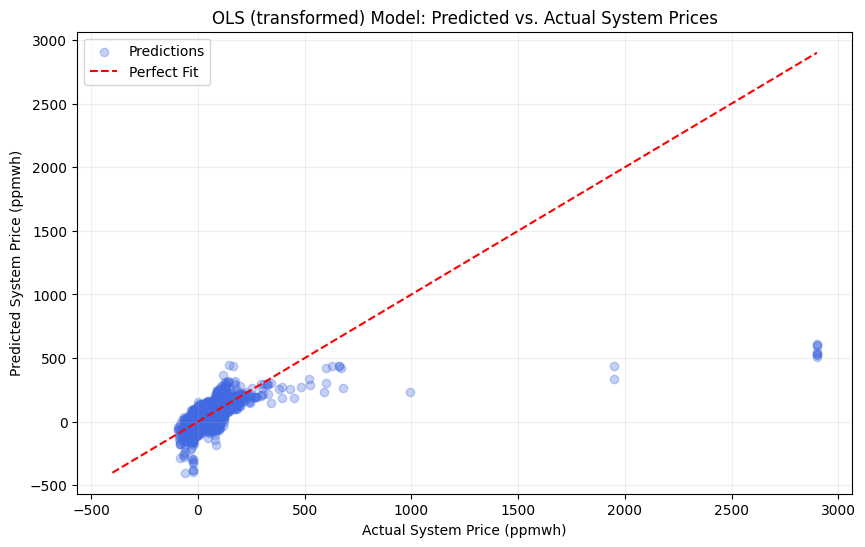

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(Y_V1_test, Y_V1_pred, alpha=0.3, color='royalblue', label='Predictions')

# Add the 'Perfect Prediction' 45-degree line to see where the model is under or over-predicting
max_val = max(Y_V1_test.max(), Y_V1_pred.max())
min_val = min(Y_V1_test.min(), Y_V1_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual System Price (ppmwh)')
plt.ylabel('Predicted System Price (ppmwh)')
plt.title('OLS (transformed) Model: Predicted vs. Actual System Prices')

# 3. Run the prediction
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

In [ ]:
#plot for lasso

y_pred_V1_lasso = lasso_v1.predict(X_V1_test_scaled)

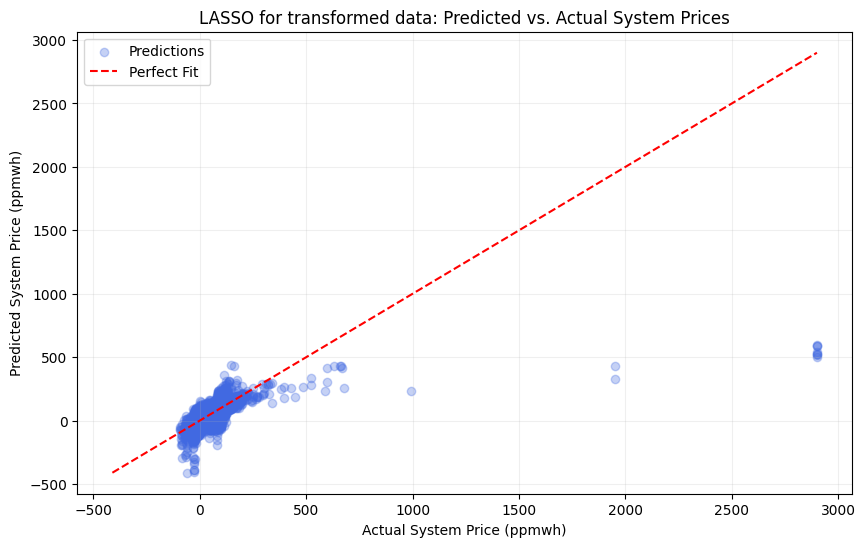

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_V1_test, y_pred_V1_lasso, alpha=0.3, color='royalblue', label='Predictions')

# Add the 'Perfect Prediction' 45-degree line to see where the model is under or over-predicting
max_val = max(Y_V1_test.max(), y_pred_V1_lasso.max())
min_val = min(Y_V1_test.min(), y_pred_V1_lasso.min())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual System Price (ppmwh)')
plt.ylabel('Predicted System Price (ppmwh)')
plt.title('LASSO for transformed data: Predicted vs. Actual System Prices')

# 3. Run the prediction
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

## M2: Split into normal (SysPrice<=£150) vs stress events (SysPrice > £150)**

In [ ]:
train_v1_normal = train_transV1_df[train_transV1_df['sysprice_ppmwh'] <= 150]
train_v1_stress = train_transV1_df[train_transV1_df['sysprice_ppmwh'] > 150]
test_v1_normal = test_transV1_df[test_transV1_df['sysprice_ppmwh'] <= 150]
test_v1_stress = test_transV1_df[test_transV1_df['sysprice_ppmwh'] > 150]

In [ ]:
print(f"Normal Training Set Shape: {train_v1_normal.shape}")
print(f"Stress Training Set Shape: {train_v1_stress.shape}")
print(f"Normal Testing Set Shape:  {test_v1_normal.shape}")
print(f"Stress Testing Set Shape:  {test_v1_stress.shape}")

Normal Training Set Shape: (34260, 16)
Stress Training Set Shape: (15546, 16)
Normal Testing Set Shape:  (17011, 16)
Stress Testing Set Shape:  (445, 16)


In [ ]:
X_train_v1_normal = train_v1_normal.drop('sysprice_ppmwh', axis=1)
Y_train_v1_normal = train_v1_normal['sysprice_ppmwh']
X_test_v1_normal = test_v1_normal.drop('sysprice_ppmwh', axis=1)
Y_test_v1_normal = test_v1_normal['sysprice_ppmwh']
X_train_v1_stress = train_v1_stress.drop('sysprice_ppmwh', axis=1)
Y_train_v1_stress = train_v1_stress['sysprice_ppmwh']
X_test_v1_stress = test_v1_stress.drop('sysprice_ppmwh', axis=1)
Y_test_v1_stress = test_v1_stress['sysprice_ppmwh']

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test sets
X_train_v1_normal_scaled = scaler.fit_transform(X_train_v1_normal)
X_test_v1_normal_scaled = scaler.transform(X_test_v1_normal)
X_train_v1_stress_scaled = scaler.fit_transform(X_train_v1_stress)
X_test_v1_stress_scaled = scaler.transform(X_test_v1_stress)

In [ ]:
# OLS for normal
# Add a constant term to include the intercept in the model
X_train_v1_normal_scaled_const = sm.add_constant(X_train_v1_normal_scaled)
X_test_v1_normal_scaled_const = sm.add_constant(X_test_v1_normal_scaled)

# Fit the OLS model
ols_v1_normal = sm.OLS(Y_train_v1_normal, X_train_v1_normal_scaled_const).fit()

print("✅ OLS Regression Model for V1 transformed data, normal events fitted successfully!\n")


#OLS for stress events
# Add a constant term to include the intercept in the model
X_train_v1_stress_scaled_const = sm.add_constant(X_train_v1_stress_scaled)
X_test_v1_stress_scaled_const = sm.add_constant(X_test_v1_stress_scaled)

#Fit the OLS model for stress events
ols_v1_stress = sm.OLS(Y_train_v1_stress, X_train_v1_stress_scaled_const).fit()

print("✅ OLS Regression Model for V1 transformed data, stress events fitted successfully!\n")

✅ OLS Regression Model for V1 transformed data, normal events fitted successfully!

✅ OLS Regression Model for V1 transformed data, stress events fitted successfully!



In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
# Display model summary for base_normal
print("✅ Results for OLS Regression Model for OLS transformed, normal events\n")
ols_v1_normal_summary = ols_v1_normal.summary()
print(ols_v1_normal_summary)

# Generate Predictions
train_v1_normal_preds = ols_v1_normal.predict(X_train_v1_normal_scaled_const)
test_v1_normal_preds = ols_v1_normal.predict(X_test_v1_normal_scaled_const)

# Calculate Metrics
train_r2_normal = r2_score(Y_train_v1_normal, train_v1_normal_preds)
train_mae_normal = mean_absolute_error (Y_train_v1_normal, train_v1_normal_preds)
test_r2_normal = r2_score(Y_test_v1_normal, test_v1_normal_preds)
test_mae_normal = mean_absolute_error(Y_test_v1_normal, test_v1_normal_preds)

# Print Results
print(f"--- R2 for OLS (transformed), normal events ---")
print(f"Train R2:  {train_r2_normal:.4f} | Train MAE: £{train_mae_normal:.2f}")
print(f"Test R2:   {test_r2_normal:.4f} | Test MAE:  £{test_mae_normal:.2f}")
print("-" * 30)

# Display model summary for base_stress
print("✅ Results for OLS Regression Model for OLS (transformed), stress events\n")
ols_v1_stress_summary = ols_v1_stress.summary()
print(ols_v1_stress_summary)

# Generate Predictions
train_v1_stress_preds = ols_v1_stress.predict(X_train_v1_stress_scaled_const)
test_v1_stress_preds = ols_v1_stress.predict(X_test_v1_stress_scaled_const)

# Calculate Metrics
train_r2_stress = r2_score(Y_train_v1_stress, train_v1_stress_preds)
train_mae_stress = mean_absolute_error(Y_train_v1_stress, train_v1_stress_preds)
test_r2_stress = r2_score(Y_test_v1_stress, test_v1_stress_preds)
test_mae_stress = mean_absolute_error(Y_test_v1_stress, test_v1_stress_preds)

# Print Results
print(f"--- R2 for OLS (transformed), stress events ---")
print(f"Train R2:  {train_r2_stress:.4f} | Train MAE: £{train_mae_stress:.2f}")
print(f"Test R2:   {test_r2_stress:.4f} | Test MAE:  £{test_mae_stress:.2f}")
print("-" * 30)

✅ Results for OLS Regression Model for OLS transformed, normal events

                            OLS Regression Results                            
Dep. Variable:         sysprice_ppmwh   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1693.
Date:                Sat, 03 Jan 2026   Prob (F-statistic):               0.00
Time:                        16:00:42   Log-Likelihood:            -1.6832e+05
No. Observations:               34260   AIC:                         3.367e+05
Df Residuals:                   34244   BIC:                         3.368e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

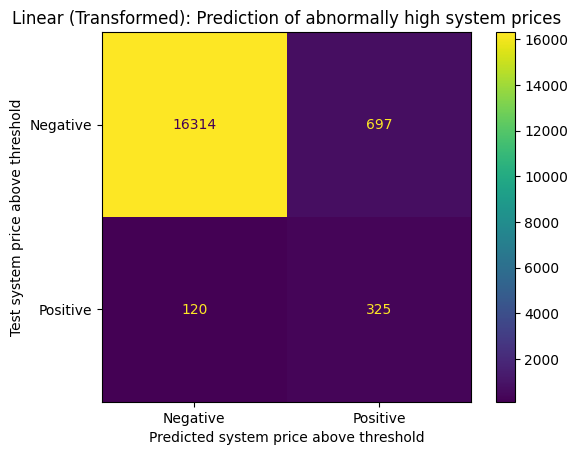


Precision score of: 0.3180, and a recall score of: 0.7303


In [ ]:
#generate precision vs recall graph

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

threshold = 150

stress_true_bool = Y_V1_test > threshold
stress_pred_bool = Y_V1_pred > threshold

confusion_matrix = confusion_matrix(stress_true_bool, stress_pred_bool)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Negative", "Positive"], )

cm_display.plot()
cm_display.ax_.set(
    title= 'Linear (Transformed): Prediction of abnormally high system prices',
    xlabel= 'Predicted system price above threshold',
    ylabel= 'Test system price above threshold'
)
plt.show()

print(f"\nPrecision score of: {precision_score(stress_true_bool, stress_pred_bool):.4f}, and a recall score of: {recall_score(stress_true_bool, stress_pred_bool):.4f}")

# Graphics for Paper

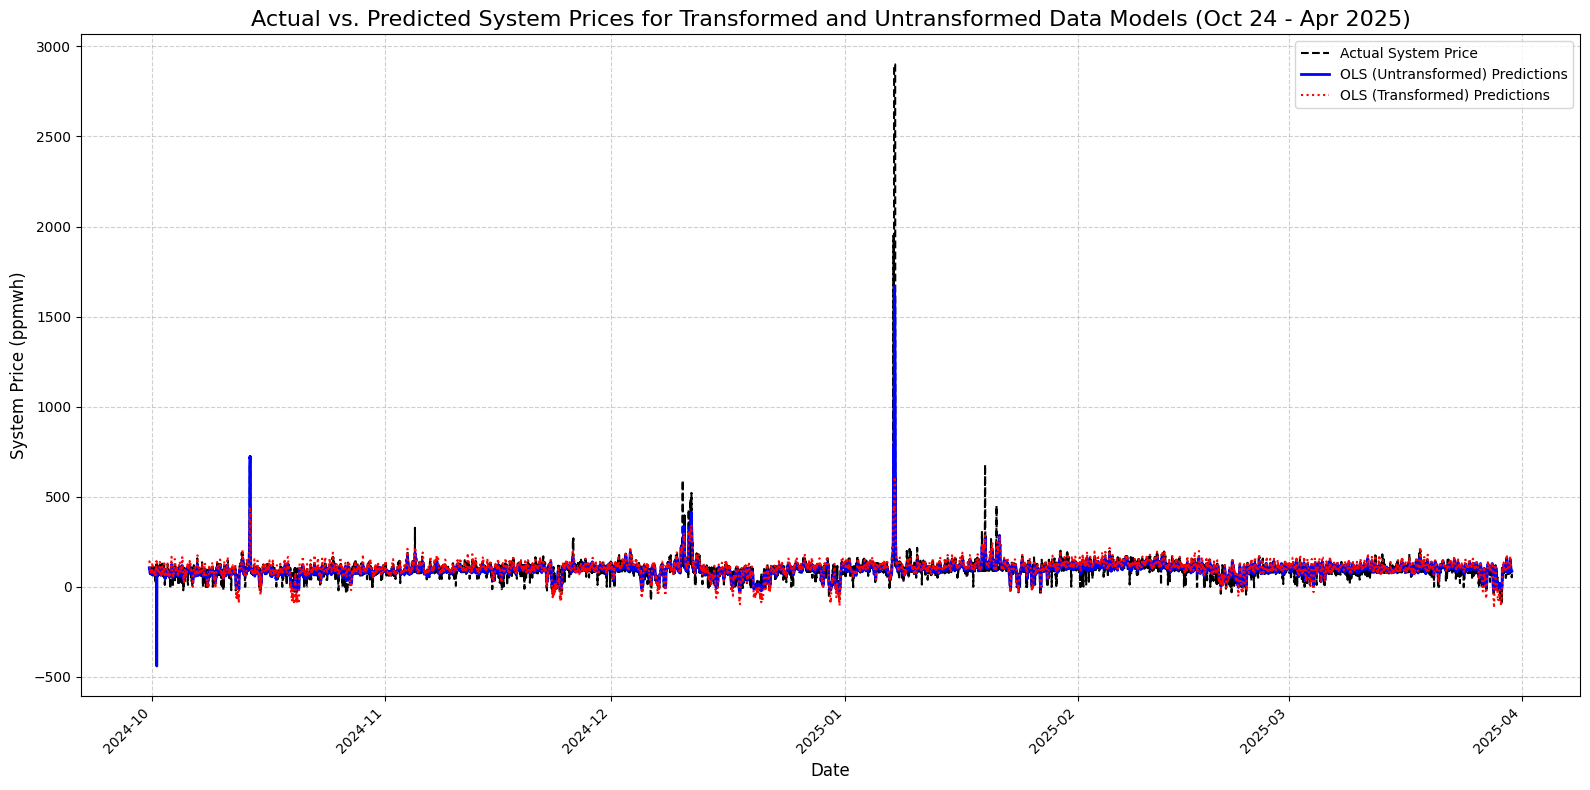

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Recreate a datetime index for the test data
# Based on the original split, test data starts from '2024-04-01 00:00:00'
# and has a length of 17456 observations.
test_datetime_index = pd.date_range(start='2024-04-01 00:00:00', periods=len(Y_base_test), freq='30min')

# Create Series for M3 OLS predictions and actuals with the new datetime index
actual_sys_price = pd.Series(Y_base_test.values, index=test_datetime_index, name='Actual System Price')
m3_ols_predictions = pd.Series(test_base_preds, index=test_datetime_index, name='OLS (Untransformed) Predictions')

# Create Series for M2 OLS predictions with the new datetime index
m2_ols_predictions = pd.Series(test_v1_preds, index=test_datetime_index, name='OLS (Transformed) Predictions')

# --- Filter for the last 6 months of test data ---
end_date = test_datetime_index.max()
start_date_6_months_ago = end_date - pd.DateOffset(months=6)

actual_sys_price_filtered = actual_sys_price.loc[start_date_6_months_ago:end_date]
m3_ols_predictions_filtered = m3_ols_predictions.loc[start_date_6_months_ago:end_date]
m2_ols_predictions_filtered = m2_ols_predictions.loc[start_date_6_months_ago:end_date]
# --- End filtering ---

plt.figure(figsize=(16, 8))

# Plot actual system prices
plt.plot(actual_sys_price_filtered.index, actual_sys_price_filtered, label='Actual System Price', color='black', linestyle = '--', linewidth=1.5)

# Plot M3 OLS predictions
plt.plot(m3_ols_predictions_filtered.index, m3_ols_predictions_filtered, label='OLS (Untransformed) Predictions', color='blue', linewidth = 2.0)

# Plot M2 OLS predictions
plt.plot(m2_ols_predictions_filtered.index, m2_ols_predictions_filtered, label='OLS (Transformed) Predictions', color='red',linestyle = ':')

plt.title('Actual vs. Predicted System Prices for Transformed and Untransformed Data Models (Oct 24 - Apr 2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('System Price (ppmwh)', fontsize=12)

# --- X-axis formatting for months ---
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Set major ticks to show every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Format as Year-Month
plt.xticks(rotation=45, ha='right') # Rotate date labels for better readability
# --- End X-axis formatting ---

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

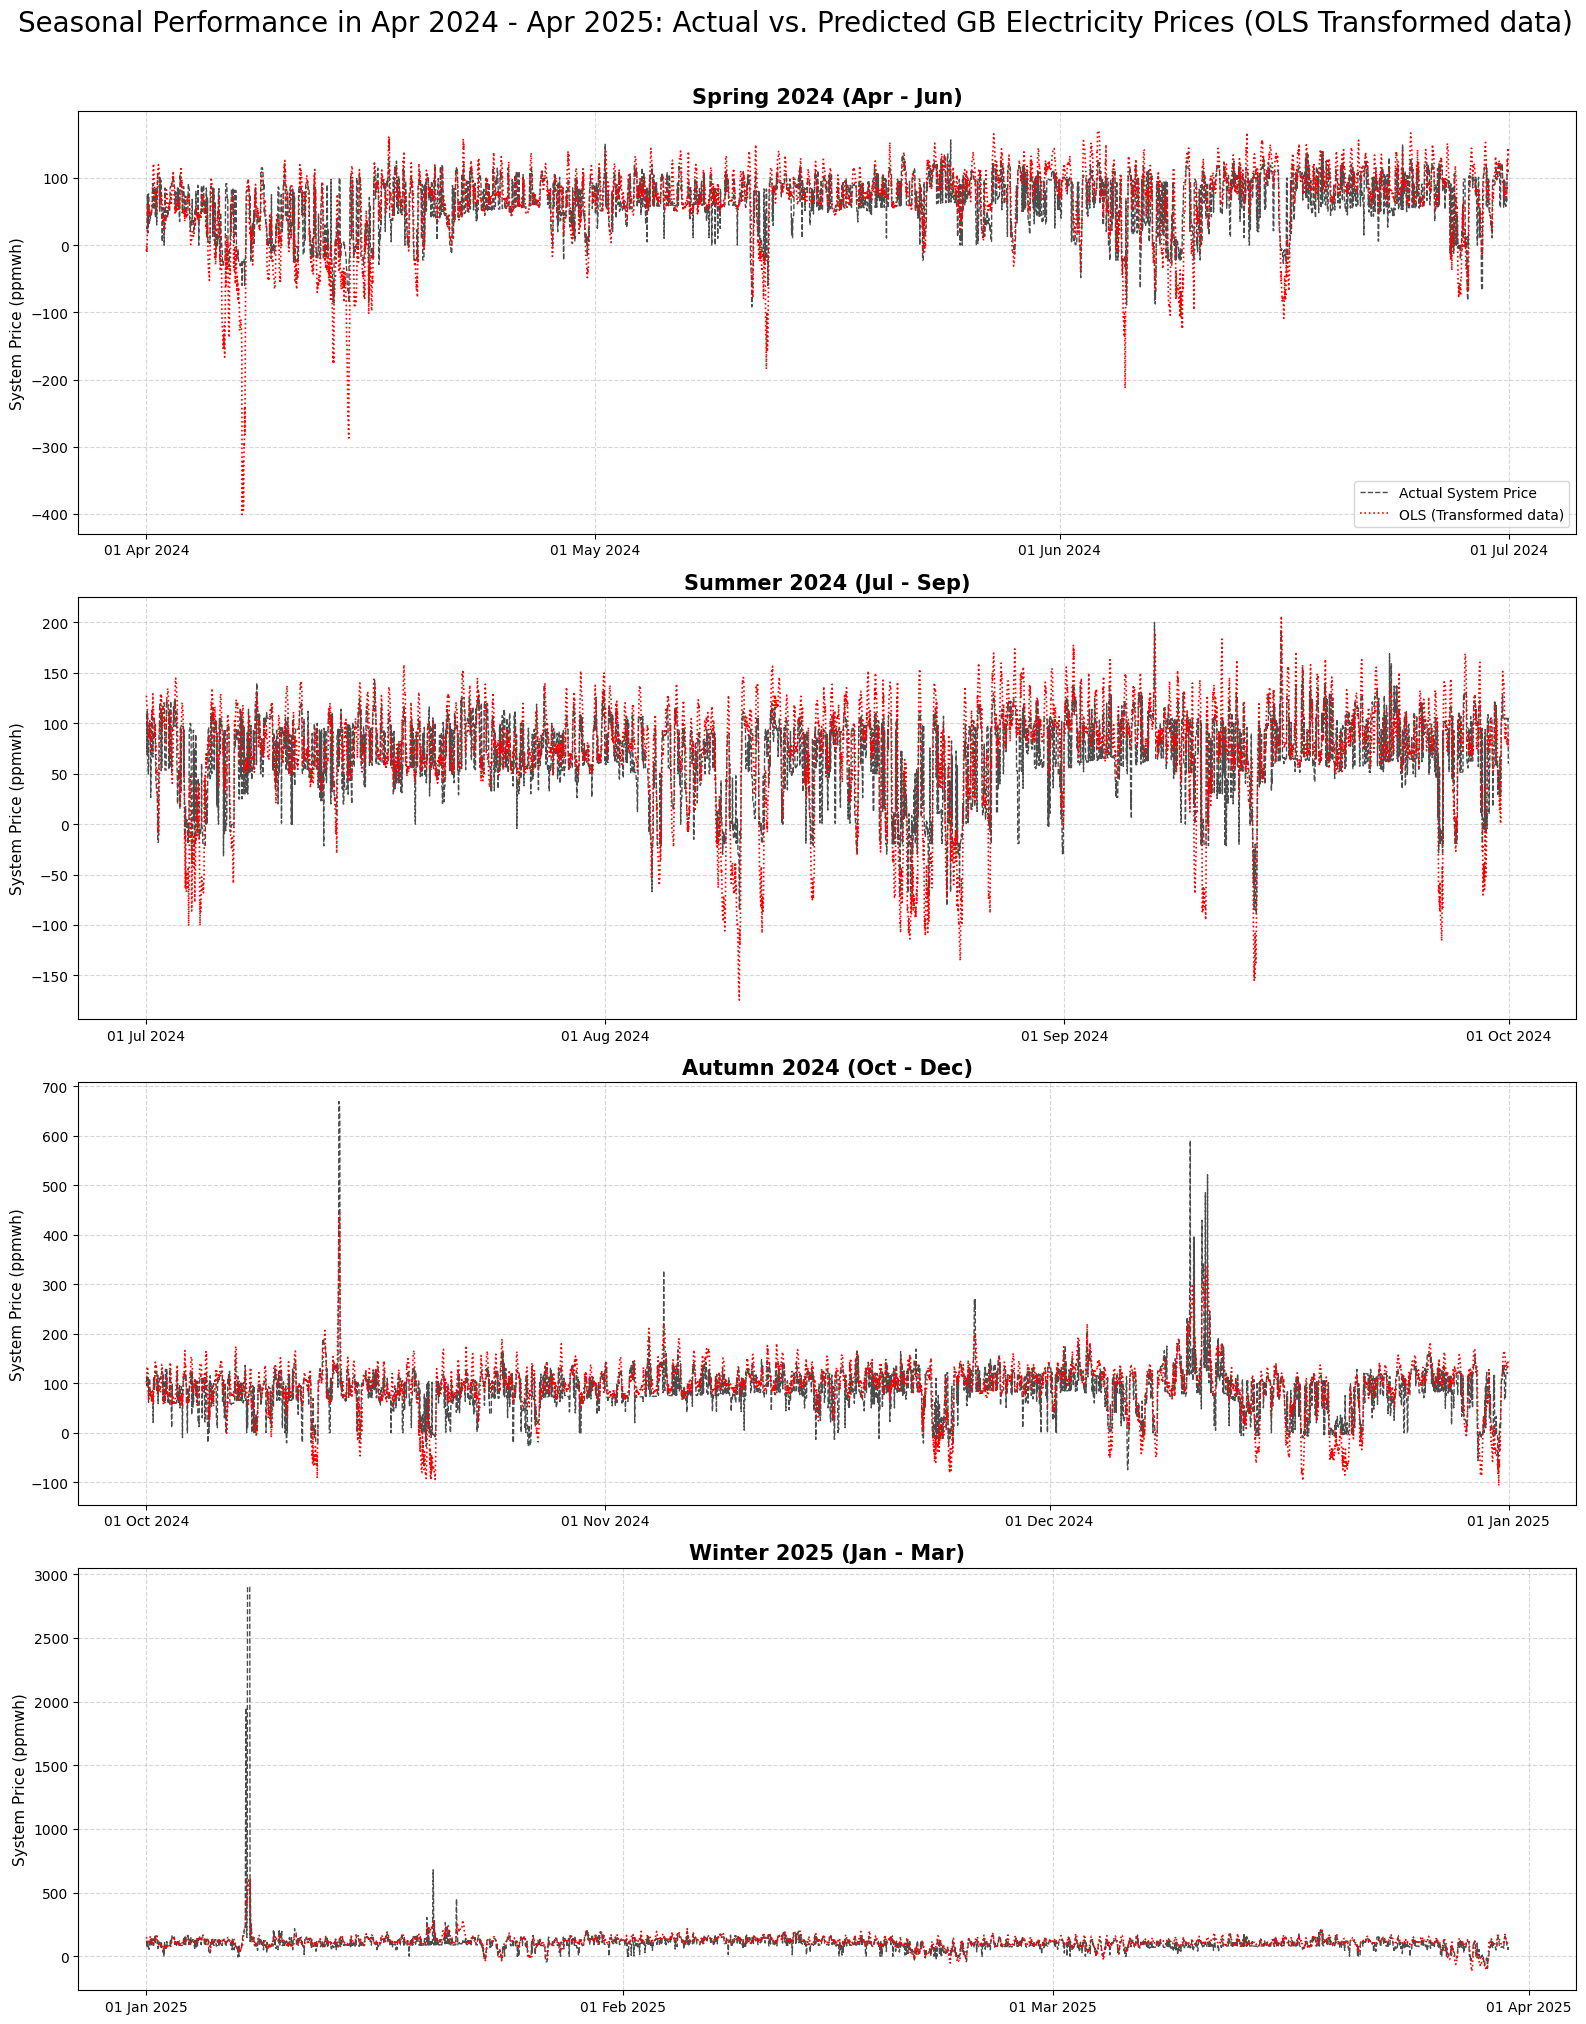

In [ ]:
#plot seasonal graphs for m2

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

#Define the seasonal periods
seasons = [
    ('Spring 2024 (Apr - Jun)', '2024-04-01', '2024-06-30 23:30'),
    ('Summer 2024 (Jul - Sep)', '2024-07-01', '2024-09-30 23:30'),
    ('Autumn 2024 (Oct - Dec)', '2024-10-01', '2024-12-31 23:30'),
    ('Winter 2025 (Jan - Mar)', '2025-01-01', '2025-03-31 23:30')
]

#Initialize the 4x1 subplot figure
fig, axes = plt.subplots(4, 1, figsize=(16, 20), sharey=False)

for i, (title, start, end) in enumerate(seasons):
    ax = axes[i]

    # Filter data for the specific season
    y_actual = actual_sys_price.loc[start:end]
    y_m2 = m2_ols_predictions.loc[start:end]

    # Plotting
    ax.plot(y_actual.index, y_actual, label='Actual System Price', color='black', linestyle='--', linewidth=1, alpha=0.7)
    ax.plot(y_m2.index, y_m2, label='OLS (Transformed data)', color='red', linestyle=':', linewidth=1.2)

    # Formatting
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_ylabel('System Price (ppmwh)', fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)

    # X-axis: Showing monthly ticks
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))

    # Adjust legend location for just the top one since every graph shares the legend
    if i == 0:
        ax.legend(loc='lower right', fontsize=10)

# Final adjustments to prevent overlap
plt.suptitle('Seasonal Performance in Apr 2024 - Apr 2025: Actual vs. Predicted GB Electricity Prices (OLS Transformed data)', fontsize=20, y=1.01)
plt.tight_layout()
plt.show()

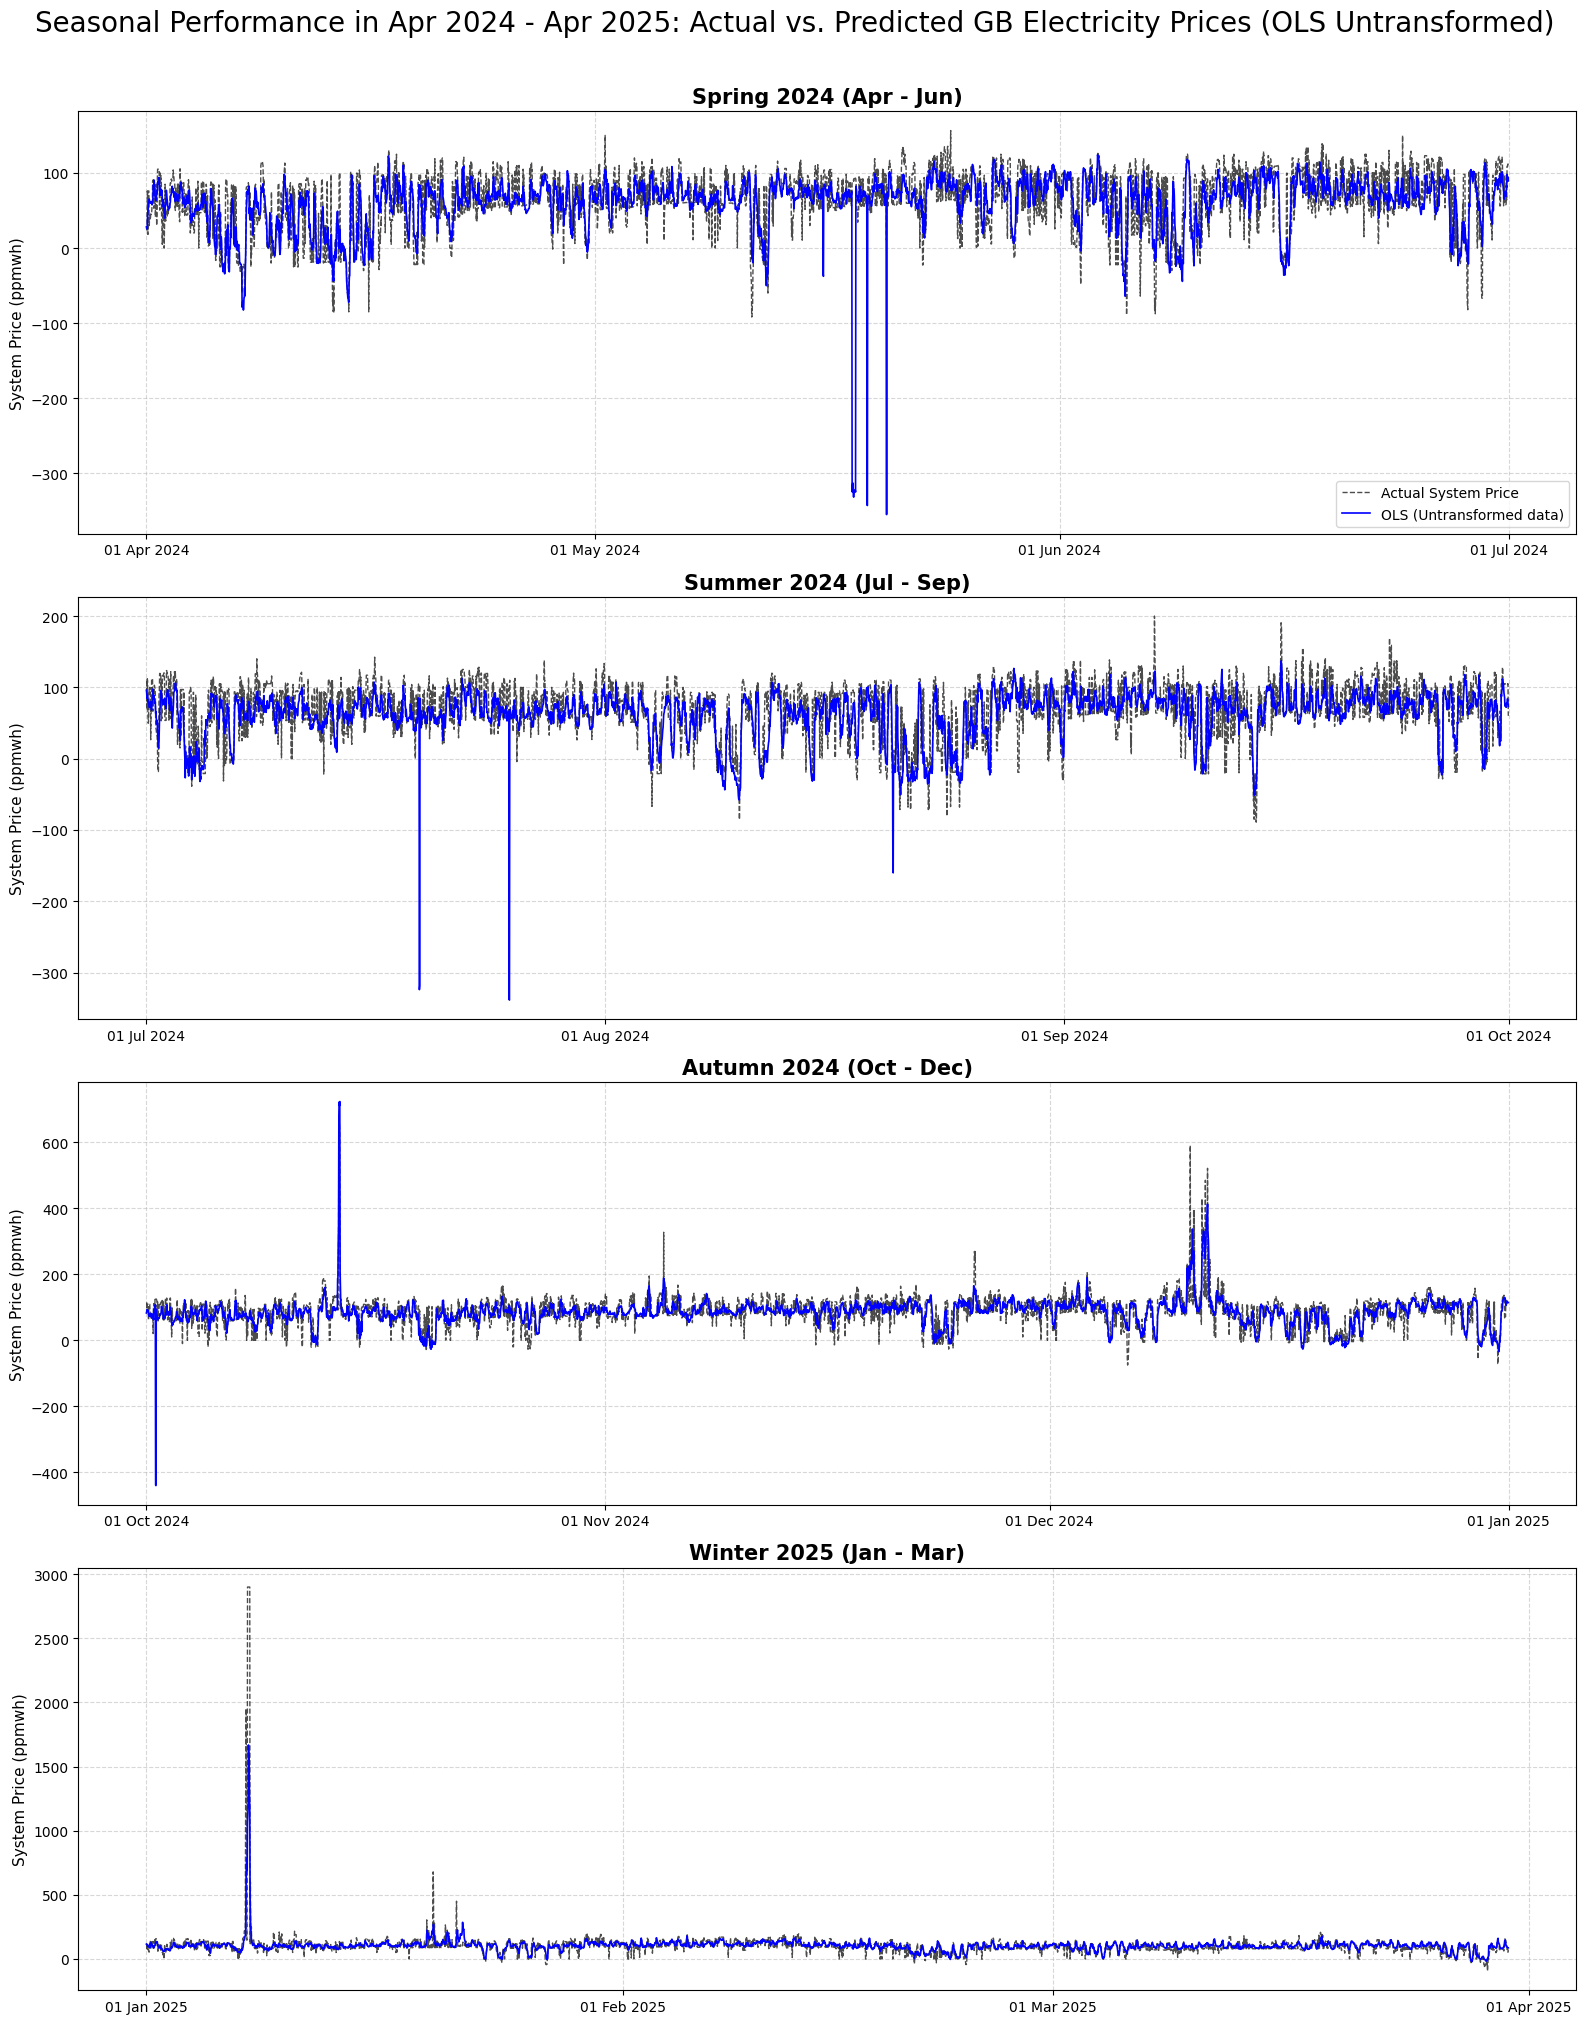

In [ ]:
#plot seasonal graphs for m3

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

#Define the seasonal periods
seasons = [
    ('Spring 2024 (Apr - Jun)', '2024-04-01', '2024-06-30 23:30'),
    ('Summer 2024 (Jul - Sep)', '2024-07-01', '2024-09-30 23:30'),
    ('Autumn 2024 (Oct - Dec)', '2024-10-01', '2024-12-31 23:30'),
    ('Winter 2025 (Jan - Mar)', '2025-01-01', '2025-03-31 23:30')
]

#Initialize the 4x1 subplot figure
fig, axes = plt.subplots(4, 1, figsize=(16, 20), sharey=False)

for i, (title, start, end) in enumerate(seasons):
    ax = axes[i]

    # Filter data for the specific season
    y_actual = actual_sys_price.loc[start:end]
    y_m3 = m3_ols_predictions.loc[start:end]

    # Plotting
    ax.plot(y_actual.index, y_actual, label='Actual System Price', color='black', linestyle='--', linewidth=1, alpha=0.7)
    ax.plot(y_m3.index, y_m3, label='OLS (Untransformed data)', color='blue', linewidth=1.2)

    # Formatting
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_ylabel('System Price (ppmwh)', fontsize=11)
    ax.grid(True, linestyle='--', alpha=0.5)

    # X-axis: Showing monthly ticks
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))

    # Adjust legend location for just the top one since every graph shares the legend
    if i == 0:
        ax.legend(loc='lower right', fontsize=10)

# Final adjustments to prevent overlap
plt.suptitle('Seasonal Performance in Apr 2024 - Apr 2025: Actual vs. Predicted GB Electricity Prices (OLS Untransformed)', fontsize=20, y=1.01)
plt.tight_layout()
plt.show()

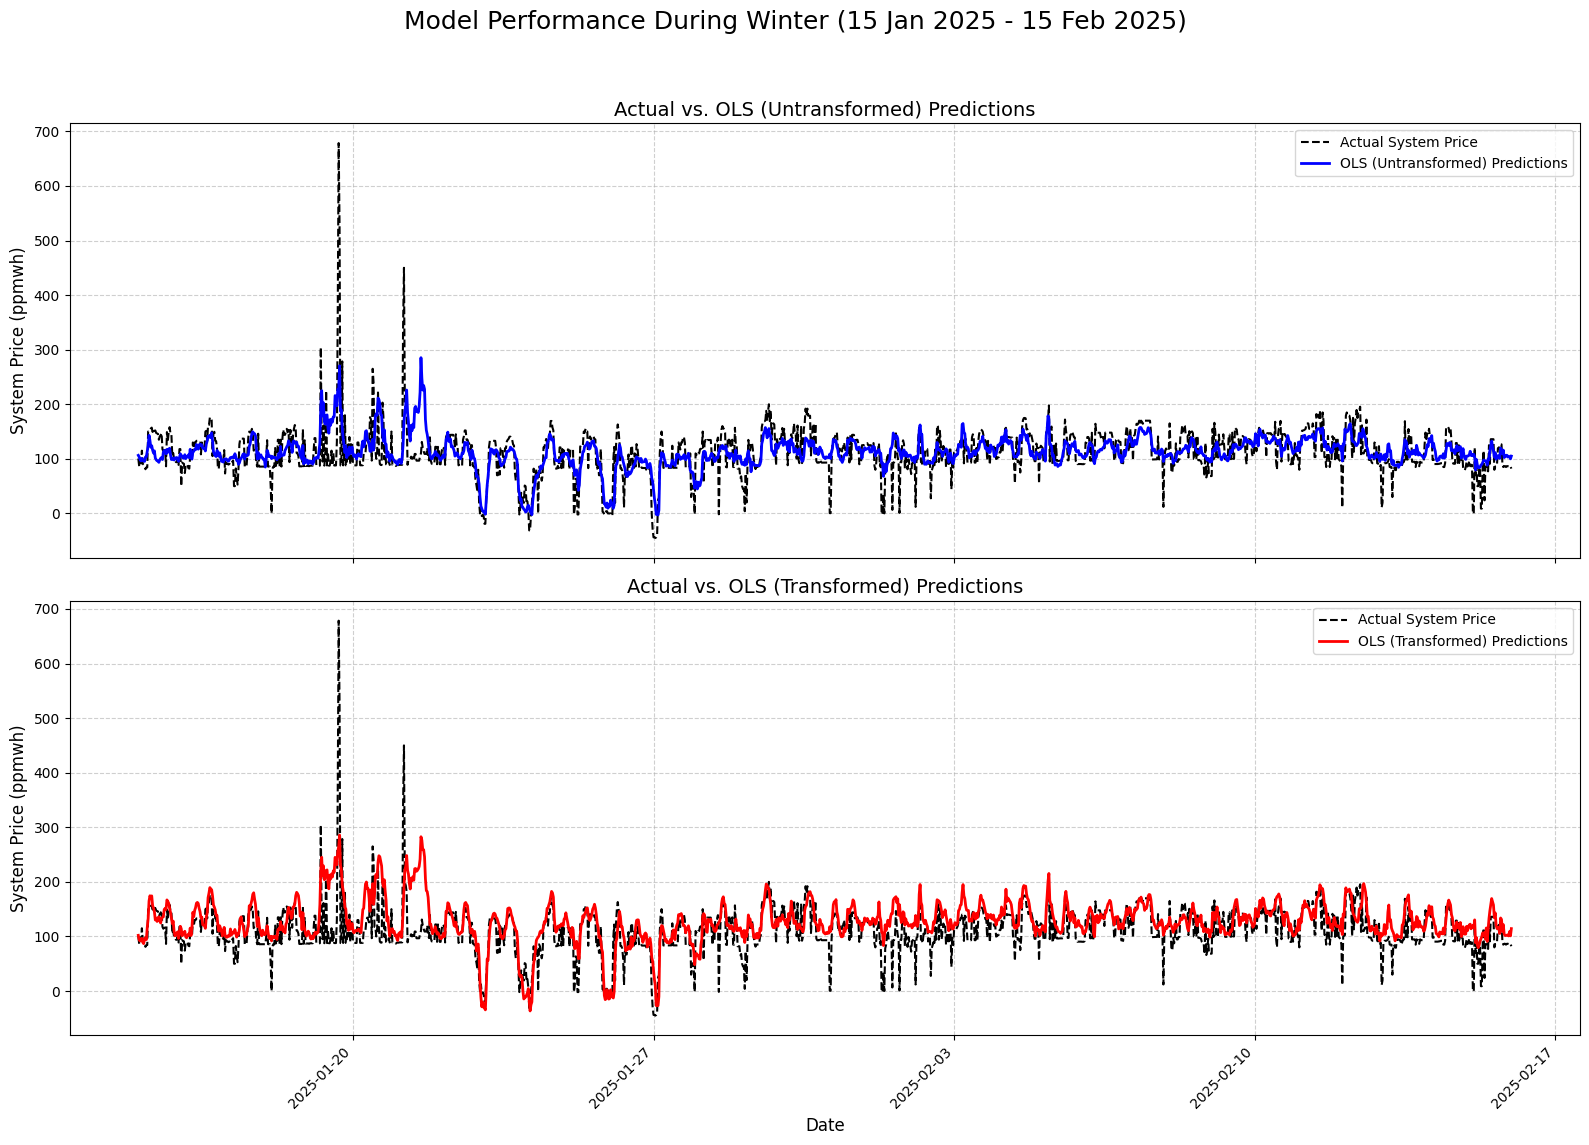

In [ ]:
#plot 1 month excluding the extreme spike to see the charts better

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define the 1 mth winter period
winter_start_date = '2025-01-15 00:00:00'
winter_end_date = '2025-02-15 23:30:00' # End of February

# Filter data for the winter period
actual_sys_price_winter = actual_sys_price.loc[winter_start_date:winter_end_date]
m3_ols_predictions_winter = m3_ols_predictions.loc[winter_start_date:winter_end_date]
m2_ols_predictions_winter = m2_ols_predictions.loc[winter_start_date:winter_end_date]

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True) # sharex=True aligns x-axes
fig.suptitle('Model Performance During Winter (15 Jan 2025 - 15 Feb 2025)', fontsize=18)

# Plot 1: Actual vs M3 OLS
axes[0].plot(actual_sys_price_winter.index, actual_sys_price_winter, label='Actual System Price', color='black', linestyle = '--', linewidth=1.5)
axes[0].plot(m3_ols_predictions_winter.index, m3_ols_predictions_winter, label='OLS (Untransformed) Predictions', color='blue', linewidth = 2.0)
axes[0].set_ylabel('System Price (ppmwh)', fontsize=12)
axes[0].set_title('Actual vs. OLS (Untransformed) Predictions', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: Actual vs M2 OLS
axes[1].plot(actual_sys_price_winter.index, actual_sys_price_winter, label='Actual System Price', color='black',linestyle = '--', linewidth=1.5)
axes[1].plot(m2_ols_predictions_winter.index, m2_ols_predictions_winter, label='OLS (Transformed) Predictions', color='red', linewidth=2.0)
axes[1].set_ylabel('System Price (ppmwh)', fontsize=12)
axes[1].set_title('Actual vs. OLS (Transformed) Predictions', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.6)

# X-axis formatting for both subplots
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7)) # Show weekly ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Format as Year-Month-Day
plt.xticks(rotation=45, ha='right') # Rotate date labels for better readability
plt.xlabel('Date', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

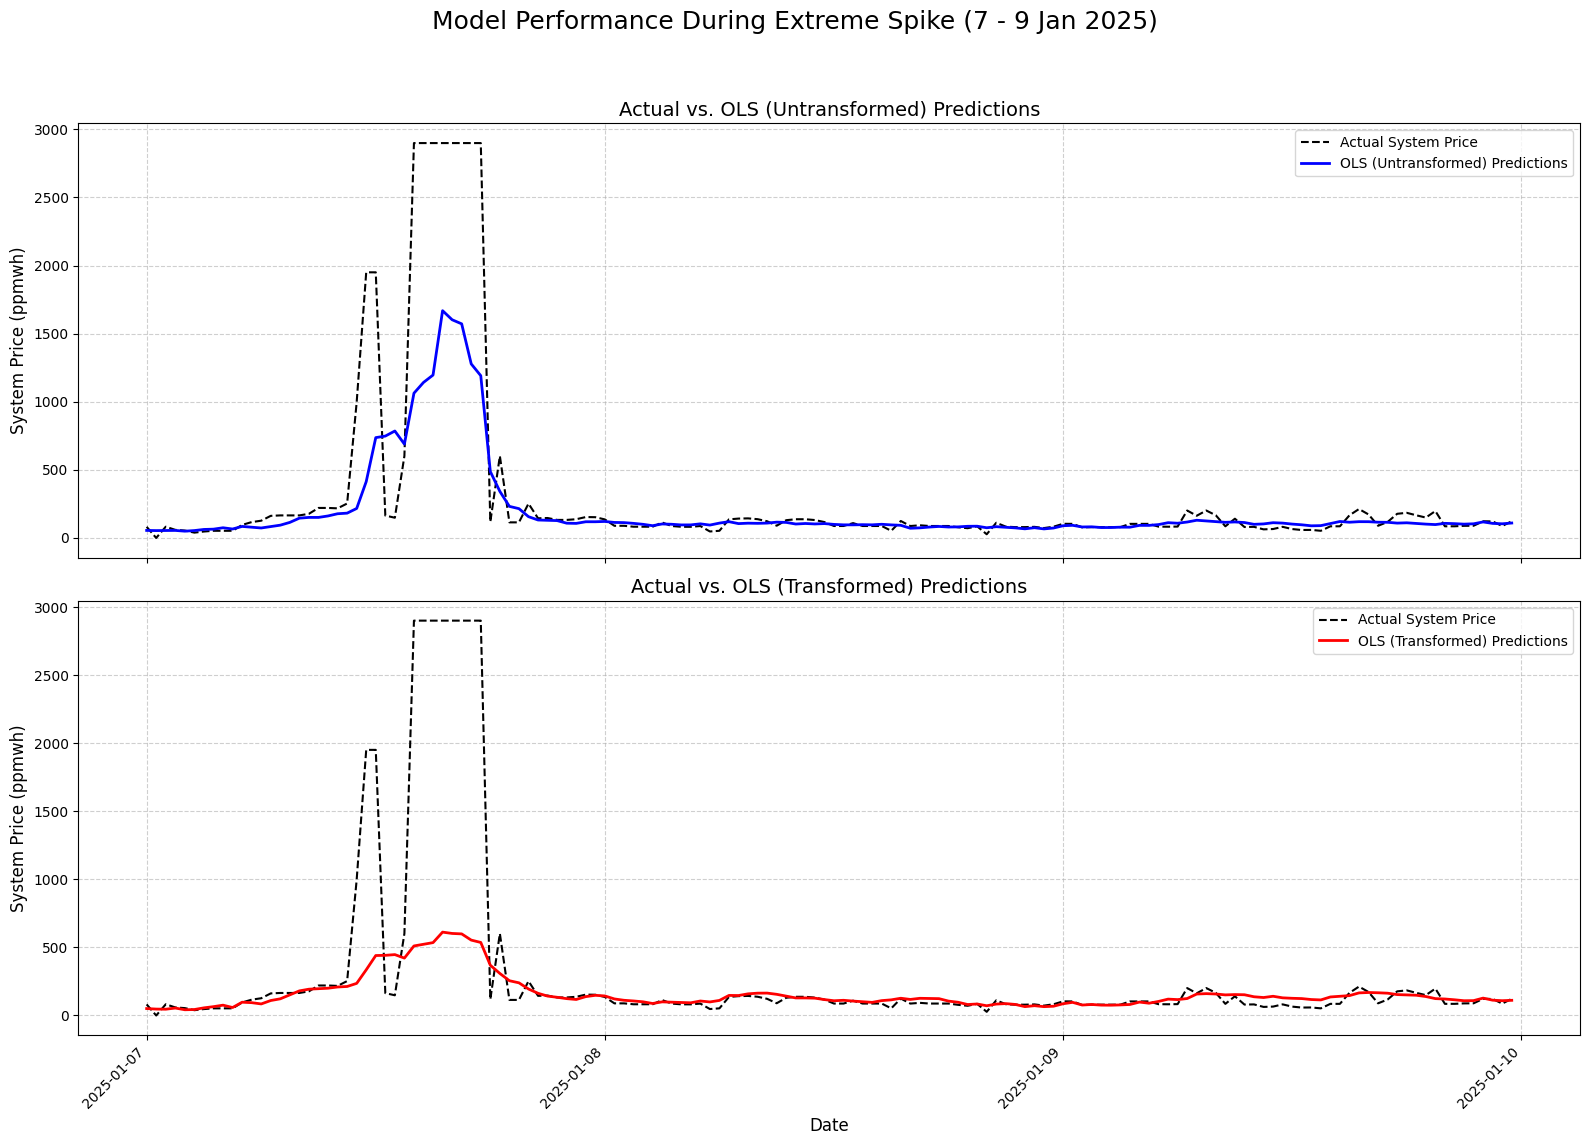

In [ ]:
#plot 3 days around extreme spike on 9 Jan 2025

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define the extreme spike
spike_start_date = '2025-01-07 00:00:00'
spike_end_date = '2025-01-09 23:30:00'

# Filter data for the spike period
actual_sys_price_spike = actual_sys_price.loc[spike_start_date:spike_end_date]
m3_ols_predictions_spike = m3_ols_predictions.loc[spike_start_date:spike_end_date]
m2_ols_predictions_spike = m2_ols_predictions.loc[spike_start_date:spike_end_date]

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True) # sharex=True aligns x-axes
fig.suptitle('Model Performance During Extreme Spike (7 - 9 Jan 2025)', fontsize=18)

# Plot 1: Actual vs M3 OLS
axes[0].plot(actual_sys_price_spike.index, actual_sys_price_spike, label='Actual System Price', color='black', linestyle = '--', linewidth=1.5)
axes[0].plot(m3_ols_predictions_spike.index, m3_ols_predictions_spike, label='OLS (Untransformed) Predictions', color='blue', linewidth = 2.0)
axes[0].set_ylabel('System Price (ppmwh)', fontsize=12)
axes[0].set_title('Actual vs. OLS (Untransformed) Predictions', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: Actual vs M2 OLS
axes[1].plot(actual_sys_price_spike.index, actual_sys_price_spike, label='Actual System Price', color='black',linestyle = '--', linewidth=1.5)
axes[1].plot(m2_ols_predictions_spike.index, m2_ols_predictions_spike, label='OLS (Transformed) Predictions', color='red', linewidth=2.0)
axes[1].set_ylabel('System Price (ppmwh)', fontsize=12)
axes[1].set_title('Actual vs. OLS (Transformed) Predictions', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.6)

# X-axis formatting for both subplots
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Show daily ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Format as Year-Month-Day
plt.xticks(rotation=45, ha='right') # Rotate date labels for better readability
plt.xlabel('Date', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

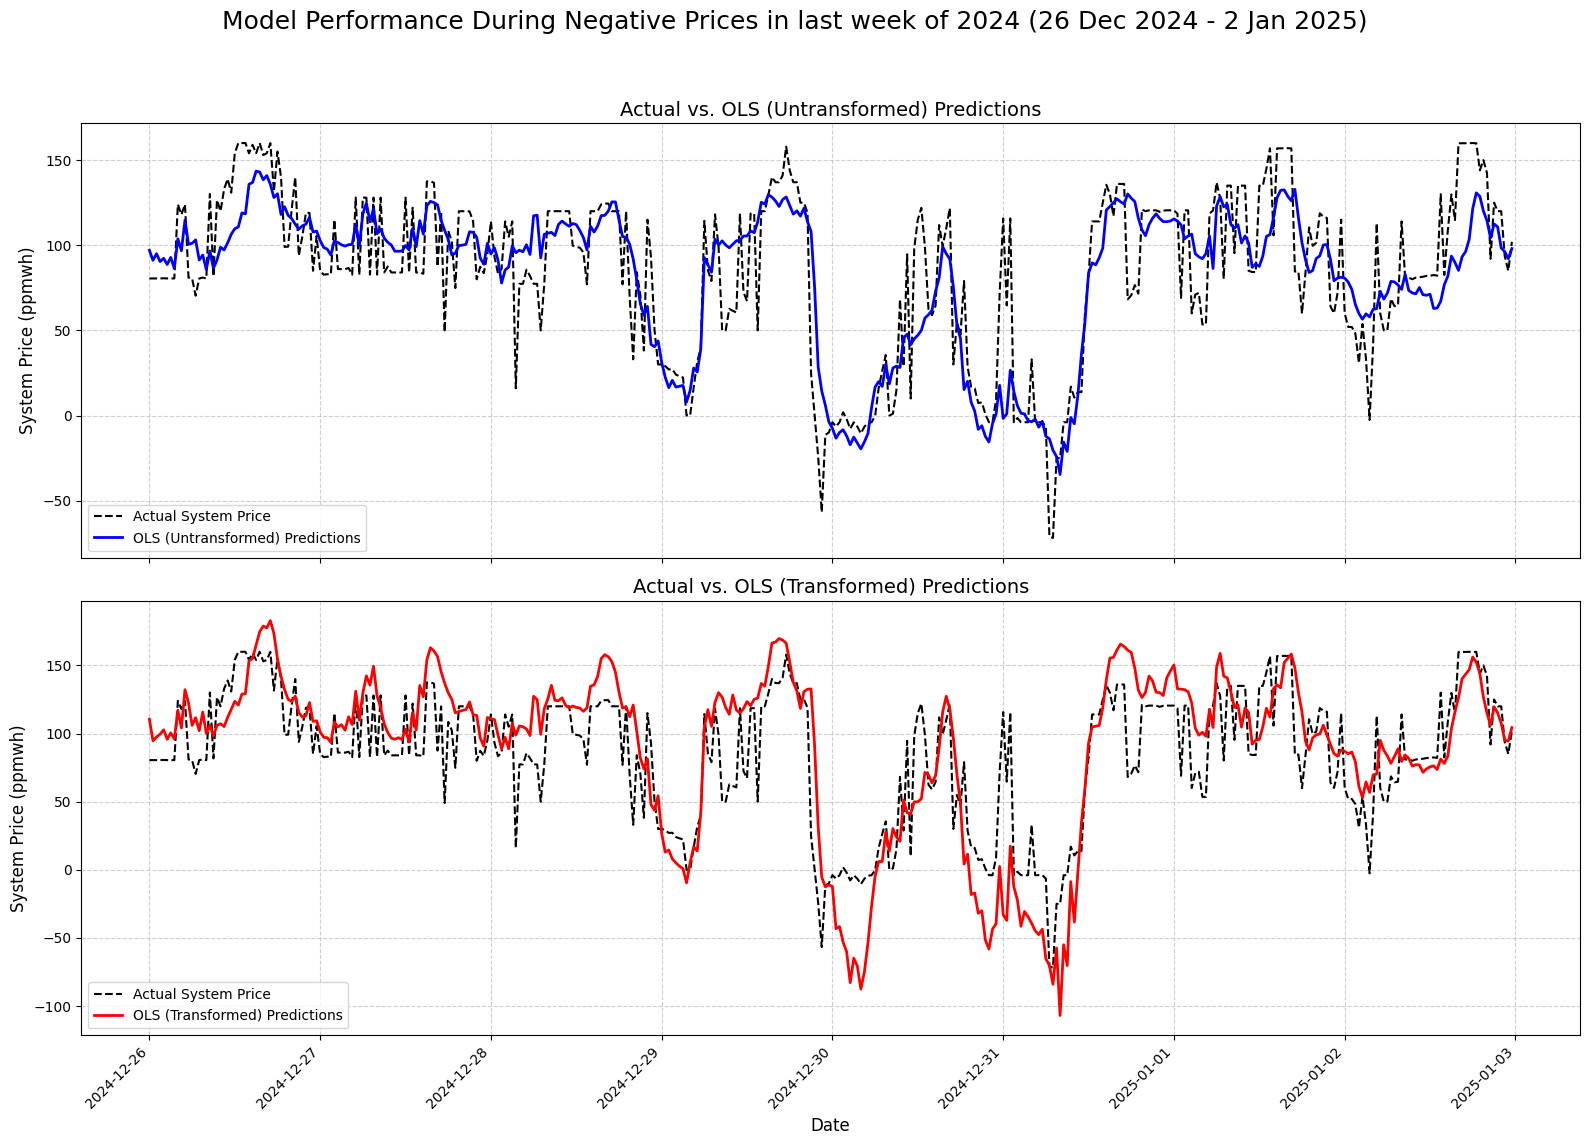

In [ ]:
#plot 1 week for the negative prices in last week of 2024

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define the neg SysPrice period
neg_start_date = '2024-12-26 00:00:00'
neg_end_date = '2025-01-02 23:30:00'

# Filter data for the spike period
actual_sys_price_neg = actual_sys_price.loc[neg_start_date:neg_end_date]
m3_ols_predictions_neg = m3_ols_predictions.loc[neg_start_date:neg_end_date]
m2_ols_predictions_neg = m2_ols_predictions.loc[neg_start_date:neg_end_date]

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True) # sharex=True aligns x-axes
fig.suptitle('Model Performance During Negative Prices in last week of 2024 (26 Dec 2024 - 2 Jan 2025)', fontsize=18)

# Plot 1: Actual vs M3 OLS
axes[0].plot(actual_sys_price_neg.index, actual_sys_price_neg, label='Actual System Price', color='black', linestyle = '--', linewidth=1.5)
axes[0].plot(m3_ols_predictions_neg.index, m3_ols_predictions_neg, label='OLS (Untransformed) Predictions', color='blue', linewidth = 2.0)
axes[0].set_ylabel('System Price (ppmwh)', fontsize=12)
axes[0].set_title('Actual vs. OLS (Untransformed) Predictions', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: Actual vs M2 OLS
axes[1].plot(actual_sys_price_neg.index, actual_sys_price_neg, label='Actual System Price', color='black',linestyle = '--', linewidth=1.5)
axes[1].plot(m2_ols_predictions_neg.index, m2_ols_predictions_neg, label='OLS (Transformed) Predictions', color='red', linewidth=2.0)
axes[1].set_ylabel('System Price (ppmwh)', fontsize=12)
axes[1].set_title('Actual vs. OLS (Transformed) Predictions', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.6)

# X-axis formatting for both subplots
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Show daily ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Format as Year-Month-Day
plt.xticks(rotation=45, ha='right') # Rotate date labels for better readability
plt.xlabel('Date', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

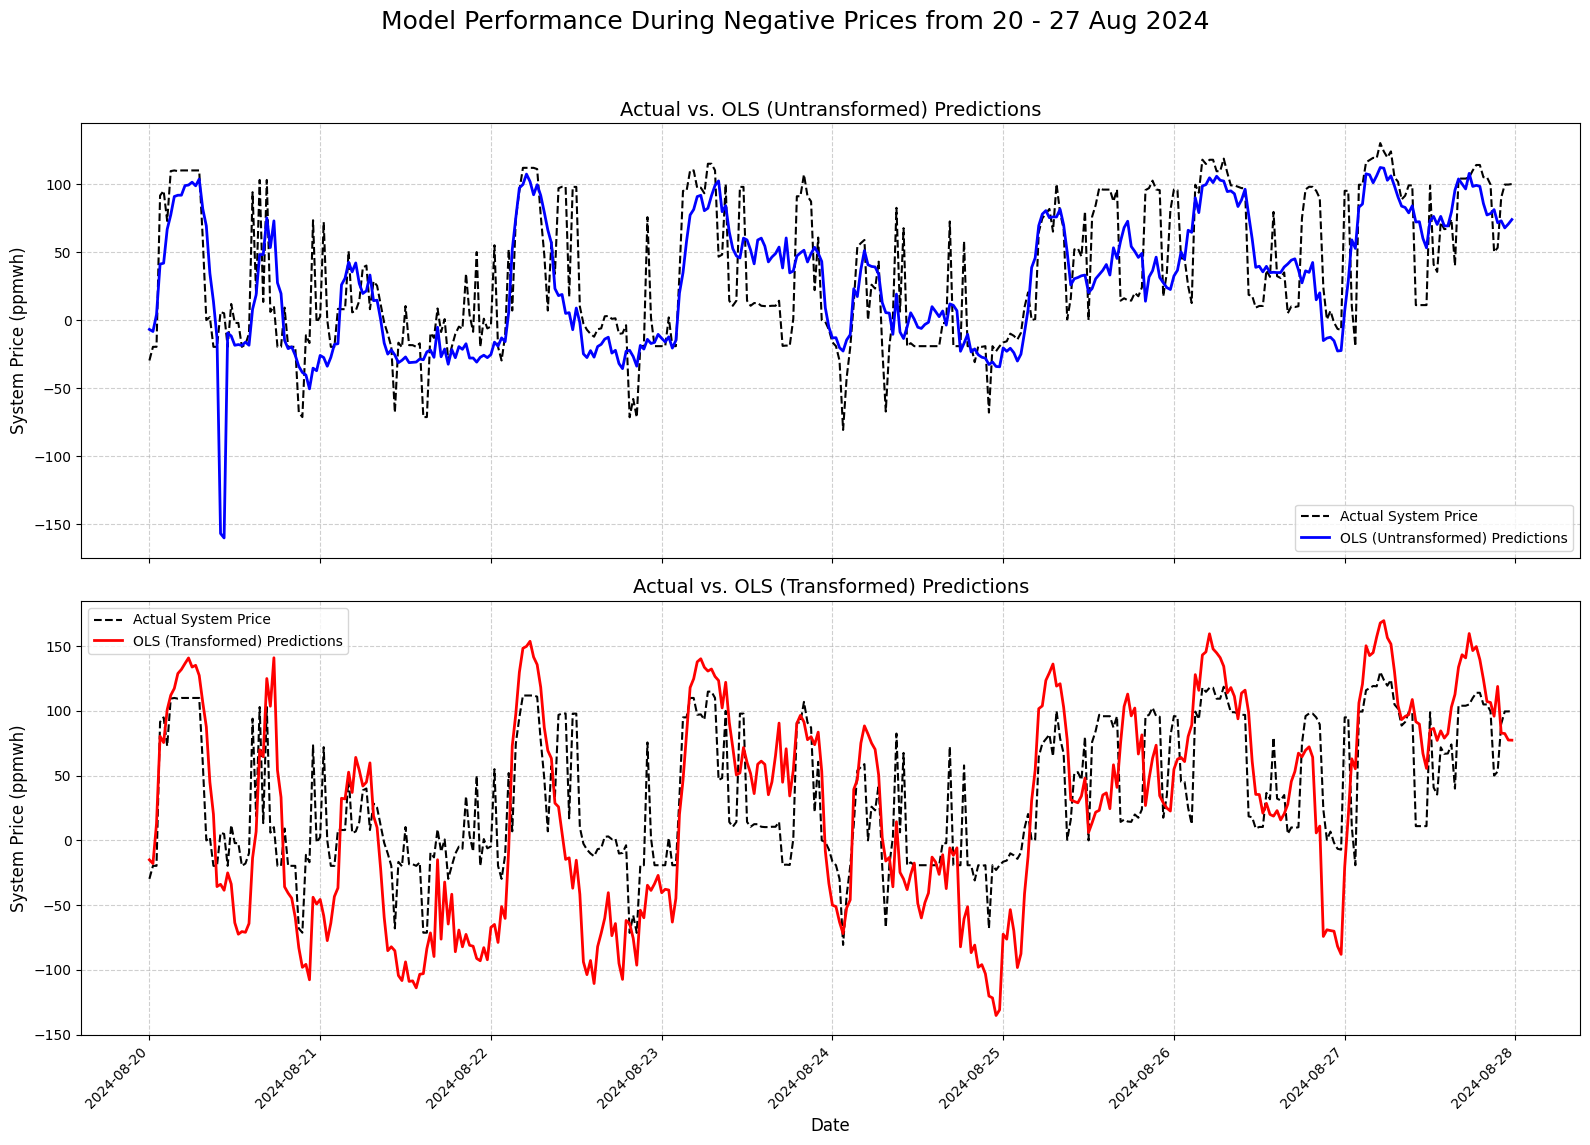

In [ ]:
#plot 1 week summer (mid Aug) of 2024 as it showed negative prices

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Define the neg SysPrice period
negaug_start_date = '2024-08-20 00:00:00'
negaug_end_date = '2024-08-27 23:30:00'

# Filter data for the spike period
actual_sys_price_negaug = actual_sys_price.loc[negaug_start_date:negaug_end_date]
m3_ols_predictions_negaug = m3_ols_predictions.loc[negaug_start_date:negaug_end_date]
m2_ols_predictions_negaug = m2_ols_predictions.loc[negaug_start_date:negaug_end_date]

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True) # sharex=True aligns x-axes
fig.suptitle('Model Performance During Negative Prices from 20 - 27 Aug 2024', fontsize=18)

# Plot 1: Actual vs M3 OLS
axes[0].plot(actual_sys_price_negaug.index, actual_sys_price_negaug, label='Actual System Price', color='black', linestyle = '--', linewidth=1.5)
axes[0].plot(m3_ols_predictions_negaug.index, m3_ols_predictions_negaug, label='OLS (Untransformed) Predictions', color='blue', linewidth = 2.0)
axes[0].set_ylabel('System Price (ppmwh)', fontsize=12)
axes[0].set_title('Actual vs. OLS (Untransformed) Predictions', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: Actual vs M2 OLS
axes[1].plot(actual_sys_price_negaug.index, actual_sys_price_negaug, label='Actual System Price', color='black',linestyle = '--', linewidth=1.5)
axes[1].plot(m2_ols_predictions_negaug.index, m2_ols_predictions_negaug, label='OLS (Transformed) Predictions', color='red', linewidth=2.0)
axes[1].set_ylabel('System Price (ppmwh)', fontsize=12)
axes[1].set_title('Actual vs. OLS (Transformed) Predictions', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, linestyle='--', alpha=0.6)

# X-axis formatting for both subplots
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) # Show daily ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Format as Year-Month-Day
plt.xticks(rotation=45, ha='right') # Rotate date labels for better readability
plt.xlabel('Date', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

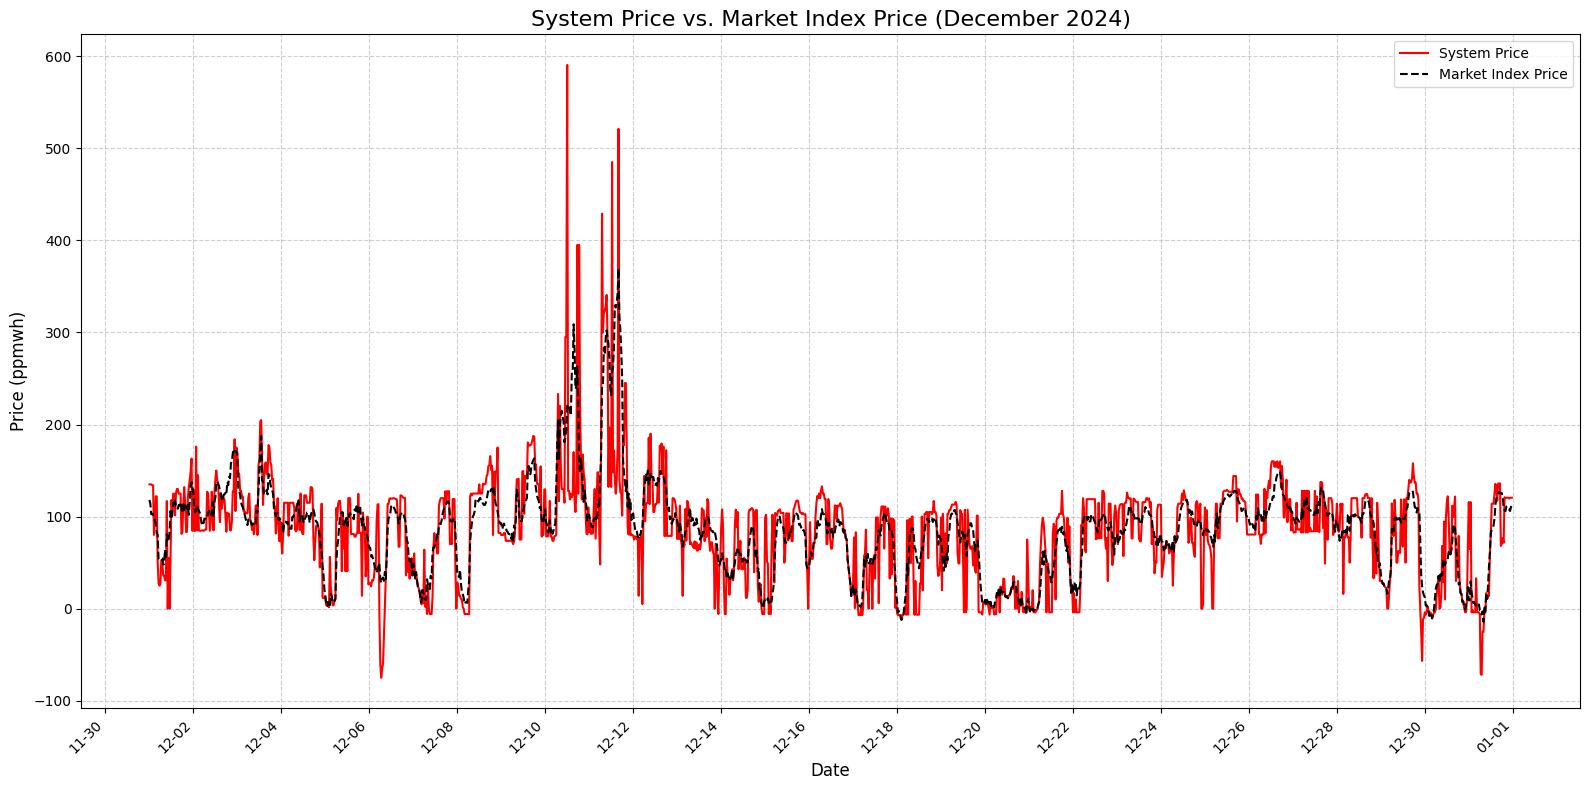

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Ensure test_base_df has a datetime index for plotting
# This assumes the 'date_sp' column was correctly set as index when test_base_df was created.
# If not, we would need to re-create it similar to the previous plot:
# test_base_df['date_sp'] = pd.to_datetime(test_base_df.index)
# test_base_df = test_base_df.set_index('date_sp')

# Assuming test_base_df's index is already datetime type
# If it's still a RangeIndex, then we need to apply the test_datetime_index as done before
# For consistency, let's re-create the full test_base_df with a datetime index
# as it might have been loaded from CSV without one in previous steps, leading to issues.

# Re-create a datetime index for the full test data
test_datetime_index_full = pd.date_range(start='2024-04-01 00:00:00', periods=len(test_base_df), freq='30min')
test_base_df_dt = test_base_df.copy()
test_base_df_dt.index = test_datetime_index_full

# --- Filter for a single month of data (e.g., December 2024) ---
start_date_month = '2024-12-01 00:00:00'
end_date_month = '2024-12-31 23:30:00'

filtered_df = test_base_df_dt.loc[start_date_month:end_date_month]
# --- End filtering ---

plt.figure(figsize=(16, 8))

# Plot System Price
plt.plot(filtered_df.index, filtered_df['sysprice_ppmwh'], label='System Price', color='red', linewidth=1.5)

# Plot Market Index Price
plt.plot(filtered_df.index, filtered_df['marketindexprice_ppmwh'], label='Market Index Price', color='black', linestyle='--')

plt.title('System Price vs. Market Index Price (December 2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (ppmwh)', fontsize=12)

# X-axis formatting for days within the month
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # Set major ticks to show every 2 days
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) # Format as Month-Day
plt.xticks(rotation=45, ha='right') # Rotate date labels for better readability

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()